## **Revisión de la estancia en función de variables clínicas** ##

Con este análisis de la base de datos de ACV de la Clínica de Occidente se pretende evaluar si es posible predecir la estancia con base en las características clínicas de los pacientes.

In [93]:
##Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Importar los datos
df = pd.read_csv("ResQ.csv", sep=None, engine="python", encoding="utf-8-sig")

##Analizar los datos

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Columns: 315 entries, case_id to wakeup_stroke
dtypes: float64(41), int64(5), object(269)
memory usage: 1.6+ MB


,provider_id,source,abcd2_score,age,aspects_score,bleeding_volume,bleeding_volume_control,bleeding_volume_difference,cha2ds2_vasc_score,day_1_fever_checks,...,iv_antihypertensive_to_sys_bp_lt140,nihss_score,onset_to_door,perfusion_core_volume,prestroke_mrs,prestroke_noac_timestamp,systolic_pressure,three_m_mrs,thrive_score,transfer_timestamp
count,678.0,678.000000,18.000000,678.000000,113.000000,11.000000,11.000000,8.000000,93.000000,118.000000,...,9.000000,533.000000,5.940000e+02,4.000000,435.000000,0.0,678.000000,174.000000,278.000000,0.0
mean,588.0,160.244838,4.222222,67.668142,8.371681,34.454545,34.636364,1.875000,3.752688,2.889831,...,652.777778,9.058161,7.200329e+04,74.000000,0.616092,NaN,147.035398,4.931034,3.215827,NaN
std,0.0,51.773757,1.114374,15.684214,2.391184,31.658691,32.720858,5.540436,1.571872,1.388499,...,713.845533,7.902269,1.726377e+06,53.391635,1.308328,NaN,31.476731,1.972605,1.738345,NaN
min,588.0,46.000000,2.000000,16.000000,0.000000,6.000000,4.000000,-3.000000,0.000000,0.000000,...,40.000000,0.000000,-4.420400e+04,24.000000,0.000000,NaN,62.000000,0.000000,0.000000,NaN
25%,588.0,137.000000,3.250000,58.000000,7.000000,8.000000,8.000000,0.000000,3.000000,2.000000,...,114.000000,3.000000,8.900000e+01,34.500000,0.000000,NaN,125.000000,4.250000,2.000000,NaN
50%,588.0,176.000000,4.000000,69.000000,10.000000,29.000000,26.000000,0.000000,4.000000,4.000000,...,200.000000,7.000000,2.180000e+02,66.000000,0.000000,NaN,144.000000,6.000000,3.000000,NaN
75%,588.0,190.250000,5.000000,79.000000,10.000000,48.500000,56.000000,0.750000,5.000000,4.000000,...,1278.000000,13.000000,5.187500e+02,105.500000,0.000000,NaN,166.000000,6.000000,4.000000,NaN
max,588.0,243.000000,6.000000,98.000000,10.000000,107.000000,104.000000,15.000000,8.000000,4.000000,...,1800.000000,42.000000,4.207609e+07,140.000000,5.000000,NaN,270.000000,6.000000,8.000000,NaN


In [94]:
for i, col in enumerate(df.columns, 1):
    print(f"{i:3d}. {col}")

  1. case_id
  2. provider
  3. provider_id
  4. source
  5. abcd2_score
  6. admission_department
  7. age
  8. anticoagulant_reversal
  9. anticoagulant_reversal_timestamp
 10. arrival_mode
 11. aspects_score
 12. atrial_fibrillation_or_flutter
 13. before_onset_antidiabetics
 14. before_onset_antihypertensives
 15. before_onset_any_anticoagulant
 16. before_onset_any_antiplatelet
 17. before_onset_apixaban
 18. before_onset_asa
 19. before_onset_cilostazol
 20. before_onset_clopidogrel
 21. before_onset_contraception
 22. before_onset_dabigatran
 23. before_onset_dipyridamole
 24. before_onset_edoxaban
 25. before_onset_heparin
 26. before_onset_other
 27. before_onset_other_anticoagulant
 28. before_onset_other_antiplatelet
 29. before_onset_prasugrel
 30. before_onset_rivaroxaban
 31. before_onset_statin
 32. before_onset_ticagrelor
 33. before_onset_ticlopidine
 34. before_onset_warfarin
 35. bleeding_reason_aneurysm
 36. bleeding_reason_angiopathy
 37. bleeding_reason_anticoagul

In [95]:
df.head(5)

,case_id,provider,provider_id,source,abcd2_score,admission_department,age,anticoagulant_reversal,anticoagulant_reversal_timestamp,arrival_mode,...,transferred_from_hospital,vte_gcs,vte_ipc,vte_lmwh,vte_other,vte_ufh,vte_vfp,vte_warfarin,vte_xa_inhibitor,wakeup_stroke
0,076ccacd-1b5d-44cc-b6f3-ddfb4df39816,Clínica de Occidente,588,176,NaN,other,68,NaN,NaN,private transportation from home/scene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO
1,c9ecfb3e-a4a4-4831-8338-28d11f0f1749,Clínica de Occidente,588,161,NaN,other,77,NaN,NaN,stroke center,...,NaN,VERDADERO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO
2,9da84ca1-e1a8-4d38-a6c5-38b0ba6f7d00,Clínica de Occidente,588,161,NaN,other,71,NaN,NaN,private transportation from home/scene,...,NaN,VERDADERO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO
3,f2417a92-8fad-4d21-85a1-6ebdffae77c1,Clínica de Occidente,588,161,NaN,other,87,NaN,NaN,private transportation from home/scene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO
4,b1e0df5c-975f-4b3c-bcab-8efe9a04717f,Clínica de Occidente,588,161,NaN,other,69,NaN,NaN,private transportation from home/scene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO


In [96]:
df.tail(5)

,case_id,provider,provider_id,source,abcd2_score,admission_department,age,anticoagulant_reversal,anticoagulant_reversal_timestamp,arrival_mode,...,transferred_from_hospital,vte_gcs,vte_ipc,vte_lmwh,vte_other,vte_ufh,vte_vfp,vte_warfarin,vte_xa_inhibitor,wakeup_stroke
673,58ad7fa6-b443-41bd-b992-522d6c144ccc,Clínica de Occidente,588,243,NaN,critical care/icu,53,NaN,NaN,private transportation from home/scene,...,NaN,FALSO,FALSO,VERDADERO,FALSO,FALSO,VERDADERO,FALSO,FALSO,VERDADERO
674,9ddc1aa2-0ba0-4e84-bbd4-61ea682af783,Clínica de Occidente,588,243,NaN,neurology,69,NaN,NaN,private transportation from home/scene,...,NaN,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO
675,3eb6180a-1cbf-4ce7-be6b-99e8676a28d3,Clínica de Occidente,588,243,NaN,neurology,70,NaN,NaN,ems from home/scene,...,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO
676,2ebdce9d-1830-4861-a40c-a8baef45beb5,Clínica de Occidente,588,243,NaN,other,86,NaN,NaN,ems from home/scene,...,NaN,FALSO,FALSO,VERDADERO,FALSO,FALSO,VERDADERO,FALSO,FALSO,VERDADERO
677,aa145ec2-6f1a-4542-bbb6-b4c4629b99bf,Clínica de Occidente,588,243,NaN,other,90,NaN,NaN,private transportation from home/scene,...,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO


A continuación se realiza una seleccion de las variables más relevantes de la base de datos, organizadas en diferentes grupos, con el objetivo de explorar sus asociaciones y construir un modelo predictivo de la **estancia hospitalaria (en días)**. 

Este trabajo se realiza en consecuencia con la literatura médica revisando lo que se ha reportado como relevante a la hora de evaluar la estancia en pacientes con ACV 


1. **Características demográficas**
- **edad** → edad del paciente.  
- **sexo** → sexo del paciente.  

Estas variables permiten identificar patrones básicos de población que pueden influir en la duración de la hospitalización.  

---

2. **Severidad al ingreso**
- **nihss_ingreso** → escala clínica de severidad.  
- **gcs_ingreso** → nivel de conciencia medido en la escala de glasgow.  
- **aspects** → extensión inicial de la isquema en la TC.  

Estos indicadores reflejan la severidad inicial del accidente cerebrovascular y son predictores reconocidos de la evolución clínica.  

---

3. **Factores de riesgo y comorbilidad**
- **fibrilacion_auricular**  
- **cha2ds2_vasc**  
- **hipertension**  
- **diabetes**  
- **tabaquismo**  
- **mrs_previo** → estado funcional antes del ACV.  

La presencia de comorbilidades y el nivel de dependencia basal suelen prolongar la estancia.  

---

4. **Tipo de ACV y hallazgos de imagen**
- **tipo_acv**  
- **volumen_hipoperfusion**  
- **volumen_nucleo**  
- **oclusion_mca_m1**  
- **oclusion_basilar**  

Estos parámetros permiten valorar la extensión y localización del daño cerebral.  

---

5. **Tiempos asistenciales**
- **inicio_a_puerta_min**  
- **puerta_a_imagen_min**  
- **puerta_a_trombolisis_min**  
- **puerta_a_puncion_min**  
- **puncion_a_reperfusion_min**  
- **puerta_a_egreso_min**  

Los tiempos de atención son críticos para el pronóstico y pueden influir en la duración de la hospitalización.  

---

6. **Tratamientos agudos recibidos**
- **trombolisis_iv**  
- **trombectomia**  
- **craniectomia**  
- **reversion_anticoagulante**  

La necesidad de intervenciones específicas se asocia a estancias más largas o más cortas según la respuesta clínica.  

---

7. **Complicaciones intrahospitalarias**
- **transformacion_hemorragica**  
- **neumonia_post**  
- **itu_post**  
- **trombosis_venosa_post**  
- **ep_post**  

Estas complicaciones suelen prolongar significativamente la estancia hospitalaria.  

---

8. **Evolución y destino al alta**
- **mrs_egreso** → estado funcional al egreso.  
- **destino_egreso** → domicilio, rehabilitación u otra institución.  
- **tipo_institucion_egreso**  

Reflejan la recuperación funcional y el nivel de soporte requerido tras la hospitalización.  

---

9. **Variable resultado**
- **estancia_dias** → variable objetivo.  
Calculada a partir de los registros de ingreso y egreso o mediante el intervalo puerta-a-egreso cuando no se dispone de ambas fechas.  


## **Limpieza y selección de variables** ##
Dada la gran cantidad de columnas con datos faltantes se crea una copia para manipular los datos y hacer limpieza de la base

Sobre esta nueva base se realiza una limpieza de los datos, una reasignación del nombre de las variables, y se dejan las variables que por conocimiento del dominio (revisión de la literatura), pueden tener relación con la estancia en ACV.

In [97]:

# 1. Copia y eliminación de duplicados
df_clean = df.copy()
print("Duplicados antes:", df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates().reset_index(drop=True)
print("Duplicados después:", df_clean.duplicated().sum())

# 2. Diccionario de columnas relevantes (origen -> nombre legible)
vars_selected = {
    # Identificación
    "case_id": "id_caso",
    "age": "edad",
    "sex": "sexo",

    # Severidad inicial
    "nihss_score": "nihss_ingreso",
    "gcs_score": "gcs_ingreso",
    "aspects_score": "aspects",

    # Factores de riesgo
    "atrial_fibrillation_or_flutter": "fibrilacion_auricular",
    "cha2ds2_vasc_score": "cha2ds2_vasc",
    "risk_hypertension": "hipertension",
    "risk_diabetes": "diabetes",
    "risk_smoker": "tabaquismo",
    "prestroke_mrs": "mrs_previo",

    # Tipo ACV e imagen
    "stroke_type": "tipo_acv",
    "hypoperfusion_volume": "volumen_hipoperfusion",
    "perfusion_core_volume": "volumen_nucleo",
    "occlusion_mca_m1": "oclusion_mca_m1",
    "occlusion_ba": "oclusion_basilar",

    # Tiempos
    "onset_to_door": "inicio_a_puerta_min",
    "door_to_imaging": "puerta_a_imagen_min",
    "door_to_needle": "puerta_a_trombolisis_min",
    "door_to_groin": "puerta_a_puncion_min",
    "groin_to_reperfusion": "puncion_a_reperfusion_min",
    "door_to_discharge": "puerta_a_egreso_min",
    "hospital_timestamp": "ingreso_hospital",
    "discharge_date": "fecha_egreso",

    # Tratamientos
    "thrombolysis": "trombolisis_iv",
    "thrombectomy": "trombectomia",
    "craniectomy": "craniectomia",
    "anticoagulant_reversal": "reversion_anticoagulante",

    # Complicaciones
    "hemorrhagic_transformation_type": "transformacion_hemorragica",
    "post_stroke_pneumonia": "neumonia_post",
    "post_stroke_urinary_infection": "itu_post",
    "post_stroke_dvt": "trombosis_venosa_post",
    "post_stroke_pulmonary_embolism": "ep_post",

    # Evolución/Egreso
    "discharge_mrs": "mrs_egreso",
    "discharge_destination": "destino_egreso",
    "discharge_facility_type": "tipo_institucion_egreso",
}

# 3. Seleccionar solo las que existan
present = [c for c in vars_selected.keys() if c in df_clean.columns]
missing = [c for c in vars_selected.keys() if c not in df_clean.columns]

if missing:
    print("⚠️ No se encontraron estas columnas, se omiten:", missing)

df_model = df_clean[present].rename(columns={k: v for k, v in vars_selected.items() if k in present})

# 4. Normalizar fechas y calcular estancia
for col in ("ingreso_hospital", "fecha_egreso"):
    if col in df_model.columns:
        df_model[col] = pd.to_datetime(df_model[col], errors="coerce")

if all(col in df_model.columns for col in ("ingreso_hospital", "fecha_egreso")):
    delta = (df_model["fecha_egreso"] - df_model["ingreso_hospital"])
    df_model["estancia_dias_ts"] = (delta.dt.total_seconds() / 86400).round(2)
else:
    df_model["estancia_dias_ts"] = np.nan

if "puerta_a_egreso_min" in df_model.columns:
    df_model["estancia_dias_puerta"] = (df_model["puerta_a_egreso_min"] / 1440).round(2)
else:
    df_model["estancia_dias_puerta"] = np.nan

df_model["estancia_dias"] = df_model["estancia_dias_ts"].fillna(df_model["estancia_dias_puerta"])

# 5. Revisión rápida
print("Shape df_model:", df_model.shape)
print(df_model.head())


Duplicados antes: 0
Duplicados después: 0
Shape df_model: (678, 40)
                                id_caso  edad    sexo  nihss_ingreso  \
0  076ccacd-1b5d-44cc-b6f3-ddfb4df39816    68  female            5.0   
1  c9ecfb3e-a4a4-4831-8338-28d11f0f1749    77    male           27.0   
2  9da84ca1-e1a8-4d38-a6c5-38b0ba6f7d00    71    male           12.0   
3  f2417a92-8fad-4d21-85a1-6ebdffae77c1    87    male            0.0   
4  b1e0df5c-975f-4b3c-bcab-8efe9a04717f    69  female            3.0   

   gcs_ingreso  aspects fibrilacion_auricular  cha2ds2_vasc hipertension  \
0          NaN      NaN                   NaN           NaN    VERDADERO   
1          7.0      7.0              detected           3.0    VERDADERO   
2          NaN      7.0              detected           2.0    VERDADERO   
3          NaN      NaN                   NaN           NaN    VERDADERO   
4          NaN      NaN              known AF           5.0        FALSO   

  diabetes  ... neumonia_post   itu_post t

In [98]:
df_model.describe()

,edad,nihss_ingreso,gcs_ingreso,aspects,cha2ds2_vasc,mrs_previo,volumen_hipoperfusion,volumen_nucleo,inicio_a_puerta_min,puerta_a_imagen_min,puerta_a_trombolisis_min,puerta_a_puncion_min,puncion_a_reperfusion_min,puerta_a_egreso_min,ingreso_hospital,fecha_egreso,mrs_egreso,estancia_dias_ts,estancia_dias_puerta,estancia_dias
count,678.000000,533.000000,355.000000,113.000000,93.000000,435.000000,4.000000,4.000000,5.940000e+02,6.710000e+02,68.000000,50.000000,47.000000,674.000000,251,238,170.000000,111.000000,674.000000,674.000000
mean,67.668142,9.058161,13.132394,8.371681,3.752688,0.616092,119.250000,74.000000,7.200329e+04,-6.346585e+04,74.264706,-615.480000,31.468085,-32.724036,2025-03-01 20:09:40.637450240,2024-11-14 04:38:19.159663872,5.005882,102.493423,-0.023694,16.855148
min,16.000000,0.000000,3.000000,0.000000,0.000000,0.000000,69.000000,24.000000,-4.420400e+04,-4.207533e+07,-667.000000,-39631.000000,0.000000,-29213.000000,2023-01-08 06:00:00,2023-01-12 00:00:00,0.000000,-333.620000,-20.290000,-333.620000
25%,58.000000,3.000000,13.000000,7.000000,3.000000,0.000000,94.500000,34.500000,8.900000e+01,2.200000e+01,42.750000,90.500000,15.000000,3.000000,2024-05-07 04:09:00,2024-06-01 12:00:00,6.000000,60.180000,0.000000,0.000000
50%,69.000000,7.000000,15.000000,10.000000,4.000000,0.000000,119.000000,66.000000,2.180000e+02,3.300000e+01,52.000000,138.000000,20.000000,6.000000,2024-11-08 05:12:00,2024-12-01 00:00:00,6.000000,121.300000,0.000000,0.010000
75%,79.000000,13.000000,15.000000,10.000000,5.000000,0.000000,143.750000,105.500000,5.187500e+02,5.900000e+01,71.750000,190.750000,27.500000,14.000000,2025-06-05 16:34:30,2025-07-01 00:00:00,6.000000,162.900000,0.010000,0.020000
max,98.000000,42.000000,15.000000,10.000000,8.000000,5.000000,170.000000,140.000000,4.207609e+07,5.762800e+04,1484.000000,1019.000000,480.000000,122.000000,2105-11-05 08:09:00,2025-12-08 00:00:00,6.000000,303.690000,0.080000,303.690000
std,15.684214,7.902269,3.521836,2.391184,1.571872,1.308328,43.254094,53.391635,1.726377e+06,1.624293e+06,200.386091,5632.989184,68.082383,1125.745680,NaN,NaN,2.027903,106.785197,0.781865,57.554339


In [99]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_caso                     678 non-null    object        
 1   edad                        678 non-null    int64         
 2   sexo                        678 non-null    object        
 3   nihss_ingreso               533 non-null    float64       
 4   gcs_ingreso                 355 non-null    float64       
 5   aspects                     113 non-null    float64       
 6   fibrilacion_auricular       373 non-null    object        
 7   cha2ds2_vasc                93 non-null     float64       
 8   hipertension                675 non-null    object        
 9   diabetes                    675 non-null    object        
 10  tabaquismo                  532 non-null    object        
 11  mrs_previo                  435 non-null    float64       

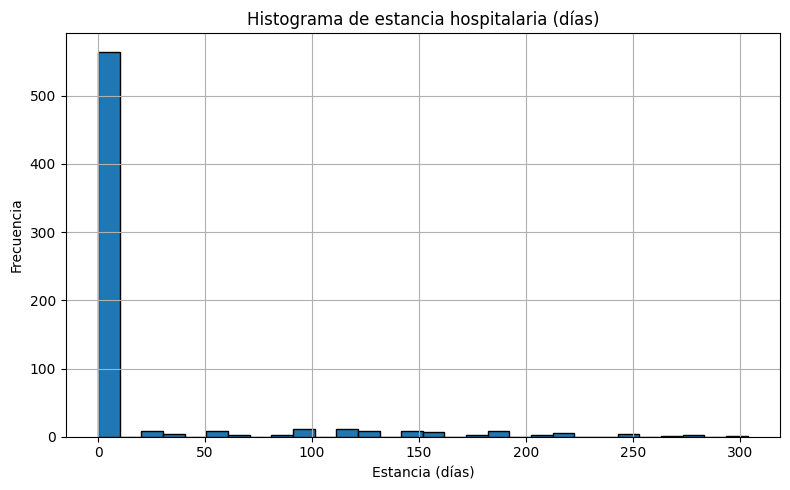

In [138]:
import matplotlib.pyplot as plt

# Histograma de estancia_dias
plt.figure(figsize=(8,5))
df_model["estancia_dias"].dropna().hist(bins=30, edgecolor="black")
plt.title("Histograma de estancia hospitalaria (días)")
plt.xlabel("Estancia (días)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

In [100]:
from pandas.api.types import CategoricalDtype

# Especificar los rangos válidos de cada escala
ordinal_specs = {
    "nihss_ingreso": list(range(0, 43)),   # 0–42
    "gcs_ingreso":   list(range(3, 16)),   # 3–15
    "aspects":       list(range(0, 11)),   # 0–10
    "mrs_previo":    list(range(0, 7)),    # 0–6
    "mrs_egreso":    list(range(0, 7)),    # 0–6
    "cha2ds2_vasc":  list(range(0, 10)),   # 0–9
}

for col, cats in ordinal_specs.items():
    if col in df_model.columns:
        s = pd.to_numeric(df_model[col], errors="coerce").round()
        s = s.clip(min(cats), max(cats)).astype("Int64")  # asegura enteros con NaN permitidos
        df_model[col] = s.astype(CategoricalDtype(categories=cats, ordered=True))

# Chequeo rápido: tipos y conteos
print(df_model.dtypes.loc[list(ordinal_specs.keys())])
for col in ordinal_specs.keys():
    if col in df_model.columns:
        print(f"\n{col} ->")
        print(df_model[col].value_counts(dropna=False).sort_index().head(15))



nihss_ingreso    category
gcs_ingreso      category
aspects          category
mrs_previo       category
mrs_egreso       category
cha2ds2_vasc     category
dtype: object

nihss_ingreso ->
nihss_ingreso
0     28
1     29
2     60
3     52
4     45
5     26
6     19
7     22
8     27
9     23
10    22
11    13
12    20
13    14
14    11
Name: count, dtype: int64

gcs_ingreso ->
gcs_ingreso
3       24
4        1
5        3
6        6
7        6
8        4
9        4
10       8
11       8
12       9
13      26
14      29
15     227
NaN    323
Name: count, dtype: int64

aspects ->
aspects
0        3
1        2
2        0
3        2
4        1
5        2
6        7
7       12
8       16
9       10
10      58
NaN    565
Name: count, dtype: int64

mrs_previo ->
mrs_previo
0      335
1       28
2       22
3       14
4       26
5       10
6        0
NaN    243
Name: count, dtype: int64

mrs_egreso ->
mrs_egreso
0       17
1        7
2        1
3        4
4        4
5        8
6      129
NaN    5

In [101]:
df_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_caso                     678 non-null    object        
 1   edad                        678 non-null    int64         
 2   sexo                        678 non-null    object        
 3   nihss_ingreso               533 non-null    category      
 4   gcs_ingreso                 355 non-null    category      
 5   aspects                     113 non-null    category      
 6   fibrilacion_auricular       373 non-null    object        
 7   cha2ds2_vasc                93 non-null     category      
 8   hipertension                675 non-null    object        
 9   diabetes                    675 non-null    object        
 10  tabaquismo                  532 non-null    object        
 11  mrs_previo                  435 non-null    category      

In [102]:
# Variables binarias a convertir
binarias = [
    "hipertension","diabetes","tabaquismo",
    "trombolisis_iv","trombectomia","craniectomia","reversion_anticoagulante",
    "transformacion_hemorragica","neumonia_post","itu_post",
    "trombosis_venosa_post","ep_post",
    "oclusion_mca_m1","oclusion_basilar"
]

# Diccionarios de equivalencia ampliados
TRUE  = {"si","sí","yes","true","t","y","1","present","detected","found","positive","verdadero"}
FALSE = {"no","false","f","n","0","none","absent","not detected","negative","neg","falso"}

def to_boolean(s: pd.Series, is_hemo: bool=False) -> pd.Series:
    """Convierte a 0/1 preservando NaN. Tratamiento especial para 'transformacion_hemorragica'."""
    if pd.api.types.is_bool_dtype(s):
        return s.astype("Int64")
    if pd.api.types.is_numeric_dtype(s):
        out = pd.Series(pd.NA, index=s.index, dtype="Int64")
        out[s == 1] = 1
        out[s == 0] = 0
        return out

    vals = s.astype(str).str.strip().str.lower()
    out = pd.Series(pd.NA, index=s.index, dtype="Int64")

    # Caso especial: transformacion_hemorragica
    if is_hemo:
        out[vals.str.contains("hi", na=False)] = 1
        out[vals.str.contains("ph", na=False)] = 1
        out[vals.eq("none")] = 0

    # General
    out[vals.isin(TRUE)  & out.isna()] = 1
    out[vals.isin(FALSE) & out.isna()] = 0
    return out

# Aplicar
for col in binarias:
    if col in df_model.columns:
        df_model[col] = to_boolean(df_model[col], is_hemo=(col=="transformacion_hemorragica"))

# Chequeo rápido
for col in [c for c in binarias if c in df_model.columns]:
    print(f"{col}: {df_model[col].value_counts(dropna=False).to_dict()}")



hipertension: {np.int64(1): 462, np.int64(0): 213, <NA>: 3}
diabetes: {np.int64(0): 518, np.int64(1): 157, <NA>: 3}
tabaquismo: {np.int64(0): 512, <NA>: 146, np.int64(1): 20}
trombolisis_iv: {<NA>: 374, np.int64(0): 240, np.int64(1): 64}
trombectomia: {<NA>: 376, np.int64(0): 252, np.int64(1): 50}
craniectomia: {<NA>: 566, np.int64(0): 108, np.int64(1): 4}
reversion_anticoagulante: {<NA>: 677, np.int64(0): 1}
transformacion_hemorragica: {<NA>: 670, np.int64(1): 8}
neumonia_post: {np.int64(0): 341, <NA>: 293, np.int64(1): 44}
itu_post: {np.int64(0): 367, <NA>: 293, np.int64(1): 18}
trombosis_venosa_post: {np.int64(0): 381, <NA>: 293, np.int64(1): 4}
ep_post: {np.int64(0): 383, <NA>: 293, np.int64(1): 2}
oclusion_mca_m1: {<NA>: 431, np.int64(0): 200, np.int64(1): 47}
oclusion_basilar: {<NA>: 431, np.int64(0): 244, np.int64(1): 3}


In [103]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_caso                     678 non-null    object        
 1   edad                        678 non-null    int64         
 2   sexo                        678 non-null    object        
 3   nihss_ingreso               533 non-null    category      
 4   gcs_ingreso                 355 non-null    category      
 5   aspects                     113 non-null    category      
 6   fibrilacion_auricular       373 non-null    object        
 7   cha2ds2_vasc                93 non-null     category      
 8   hipertension                675 non-null    Int64         
 9   diabetes                    675 non-null    Int64         
 10  tabaquismo                  532 non-null    Int64         
 11  mrs_previo                  435 non-null    category      

In [104]:
# Conversión de nominales a category
nominales = ["sexo","fibrilacion_auricular","tipo_acv","destino_egreso","tipo_institucion_egreso"]

for col in nominales:
    if col in df_model.columns:
        df_model[col] = df_model[col].astype("category")

# Chequeo después de convertir
print(df_model[nominales].dtypes)

sexo                       category
fibrilacion_auricular      category
tipo_acv                   category
destino_egreso             category
tipo_institucion_egreso    category
dtype: object


In [105]:
# 1) Diagnóstico de tiempos
time_cols = [
    "inicio_a_puerta_min","puerta_a_imagen_min","puerta_a_trombolisis_min",
    "puerta_a_puncion_min","puncion_a_reperfusion_min","puerta_a_egreso_min"
]
time_cols = [c for c in time_cols if c in df_model.columns]

print("== Diagnóstico de tiempos ==")
for c in time_cols:
    s = pd.to_numeric(df_model[c], errors="coerce")
    print(
        f"{c:28s} min={s.min()}  p1={s.quantile(0.01)}  p99={s.quantile(0.99)}  "
        f"max={s.max()}  negativos={(s<0).sum()}  n={s.notna().sum()}"
    )

# 2) Reglas de limpieza
bounds = {
    "inicio_a_puerta_min":       (0, 1*24*60),   # 0 a 1 días
    "puerta_a_imagen_min":       (0, 240),       # 0 a 4 h
    "puerta_a_trombolisis_min":  (0, 360),       # 0 a 6 h
    "puerta_a_puncion_min":      (0, 12*60),     # 0 a 12 h
    "puncion_a_reperfusion_min": (0, 2*60),      # 0 a 2 h
    "puerta_a_egreso_min":       (0, 360*24*60),  # 0 a 60 días
}

def clean_time(df, col, lo, hi):
    if col not in df.columns: 
        return
    s = pd.to_numeric(df[col], errors="coerce")
    bad = (s < lo) | (s > hi)
    print(f"Limpiando {col}: negativos/altos -> {bad.sum()} filas a NaN")
    s[bad] = np.nan
    df[col] = s

for c in bounds:
    if c in df_model.columns:
        clean_time(df_model, c, *bounds[c])

# 3) Recalcular estancias de forma segura
if {"ingreso_hospital","fecha_egreso"}.issubset(df_model.columns):
    ts_ok = (
        df_model["ingreso_hospital"].notna()
        & df_model["fecha_egreso"].notna()
        & (df_model["fecha_egreso"] >= df_model["ingreso_hospital"])
    )
    df_model.loc[ts_ok, "estancia_dias_ts"] = (
        (df_model.loc[ts_ok, "fecha_egreso"] - df_model.loc[ts_ok, "ingreso_hospital"])
        .dt.total_seconds()/86400
    ).round(2)
    df_model.loc[~ts_ok, "estancia_dias_ts"] = np.nan

if "puerta_a_egreso_min" in df_model.columns:
    df_model["estancia_dias_puerta"] = (df_model["puerta_a_egreso_min"]/1440).round(2)

# Resultado principal: usar timestamps válidos; si no hay, usar puerta->egreso positivo
df_model["estancia_dias"] = df_model["estancia_dias_ts"].fillna(df_model["estancia_dias_puerta"])


== Diagnóstico de tiempos ==
inicio_a_puerta_min          min=-44204.0  p1=-761.5  p99=43442.540000000066  max=42076089.0  negativos=16  n=594
puerta_a_imagen_min          min=-42075330.0  p1=-43463.6  p99=1563.1999999999975  max=57628.0  negativos=56  n=671
puerta_a_trombolisis_min     min=-667.0  p1=-204.02999999999997  p99=744.3199999999981  max=1484.0  negativos=1  n=68
puerta_a_puncion_min         min=-39631.0  p1=-20201.52  p99=925.4099999999996  max=1019.0  negativos=1  n=50
puncion_a_reperfusion_min    min=0.0  p1=2.3000000000000003  p99=286.7999999999996  max=480.0  negativos=0  n=47
puerta_a_egreso_min          min=-29213.0  p1=-19.08  p99=67.53999999999996  max=122.0  negativos=12  n=674
Limpiando inicio_a_puerta_min: negativos/altos -> 41 filas a NaN
Limpiando puerta_a_imagen_min: negativos/altos -> 110 filas a NaN
Limpiando puerta_a_trombolisis_min: negativos/altos -> 3 filas a NaN
Limpiando puerta_a_puncion_min: negativos/altos -> 3 filas a NaN
Limpiando puncion_a_reperfu

In [106]:
# --- Identificar variables numéricas con valores negativos ---

num_cols = df_model.select_dtypes(include=["float","int","Int64"]).columns

negativas = {}
for c in num_cols:
    s = pd.to_numeric(df_model[c], errors="coerce").dropna()
    if (s < 0).any():
        negativas[c] = {
            "min": s.min(),
            "max": s.max(),
            "negativos": (s < 0).sum(),
            "n_total": len(s)
        }

print("== Variables con valores negativos ==")
for c, stats in negativas.items():
    print(f"{c:25s} -> min={stats['min']}, max={stats['max']}, "
          f"negativos={stats['negativos']}/{stats['n_total']}")


== Variables con valores negativos ==


## Análisis univariado de las variables seleccionadas
En esta sección se exploran las distribuciones y características principales de cada variable relevante en la base `df_model`. Esto permite identificar patrones, valores atípicos y la naturaleza de los datos antes de realizar análisis multivariados o modelado predictivo.

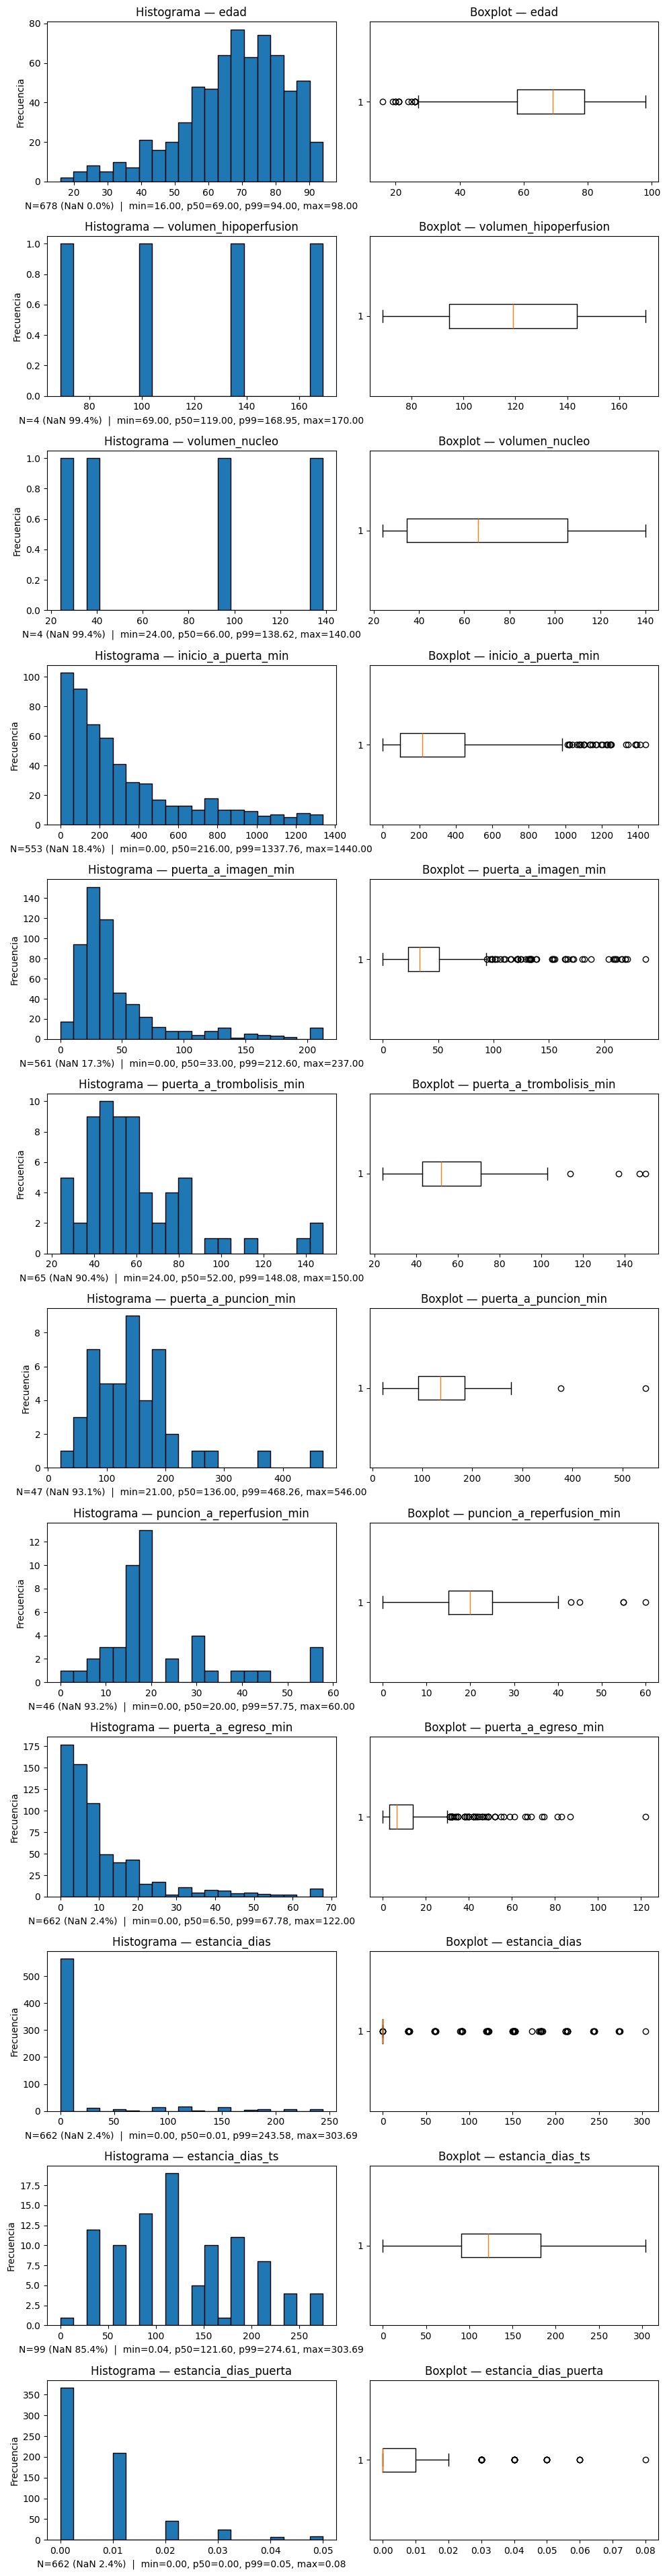

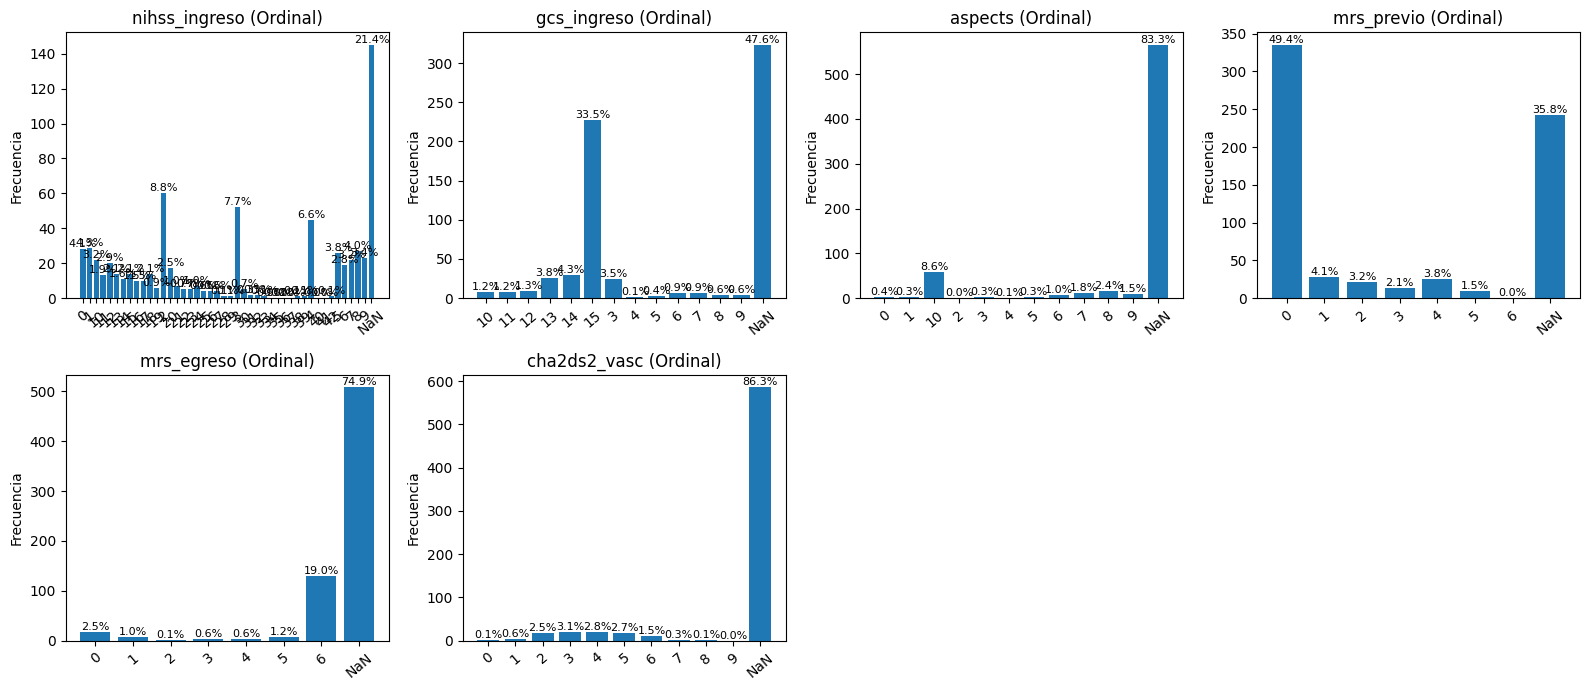

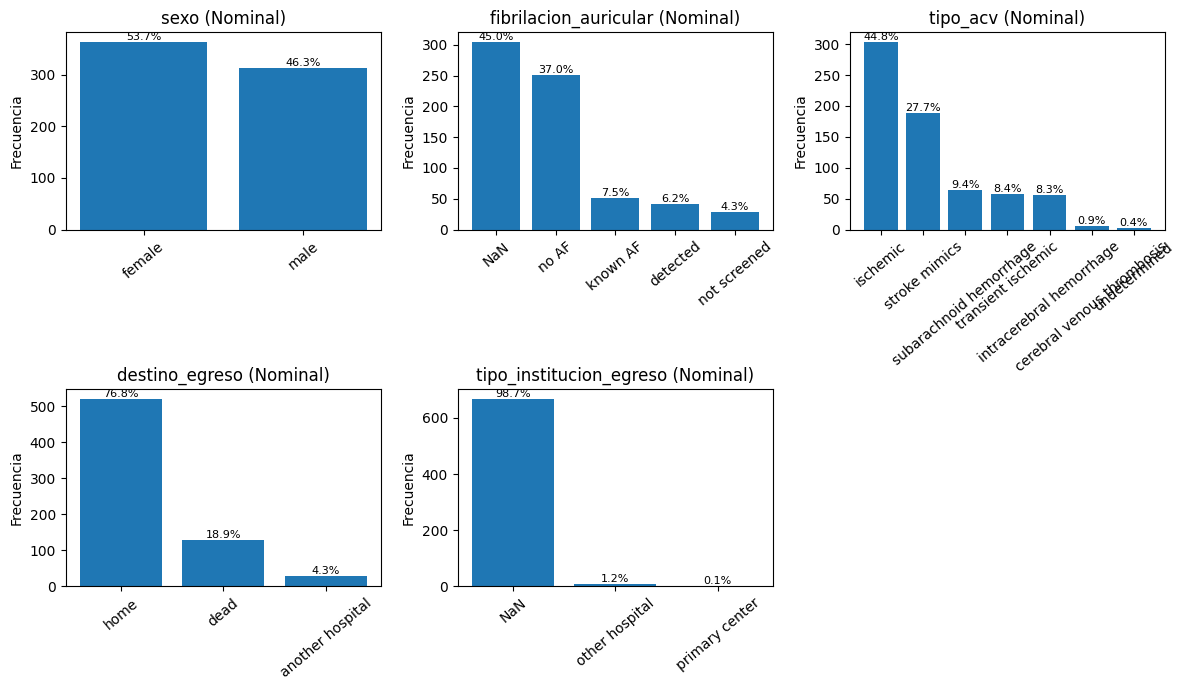

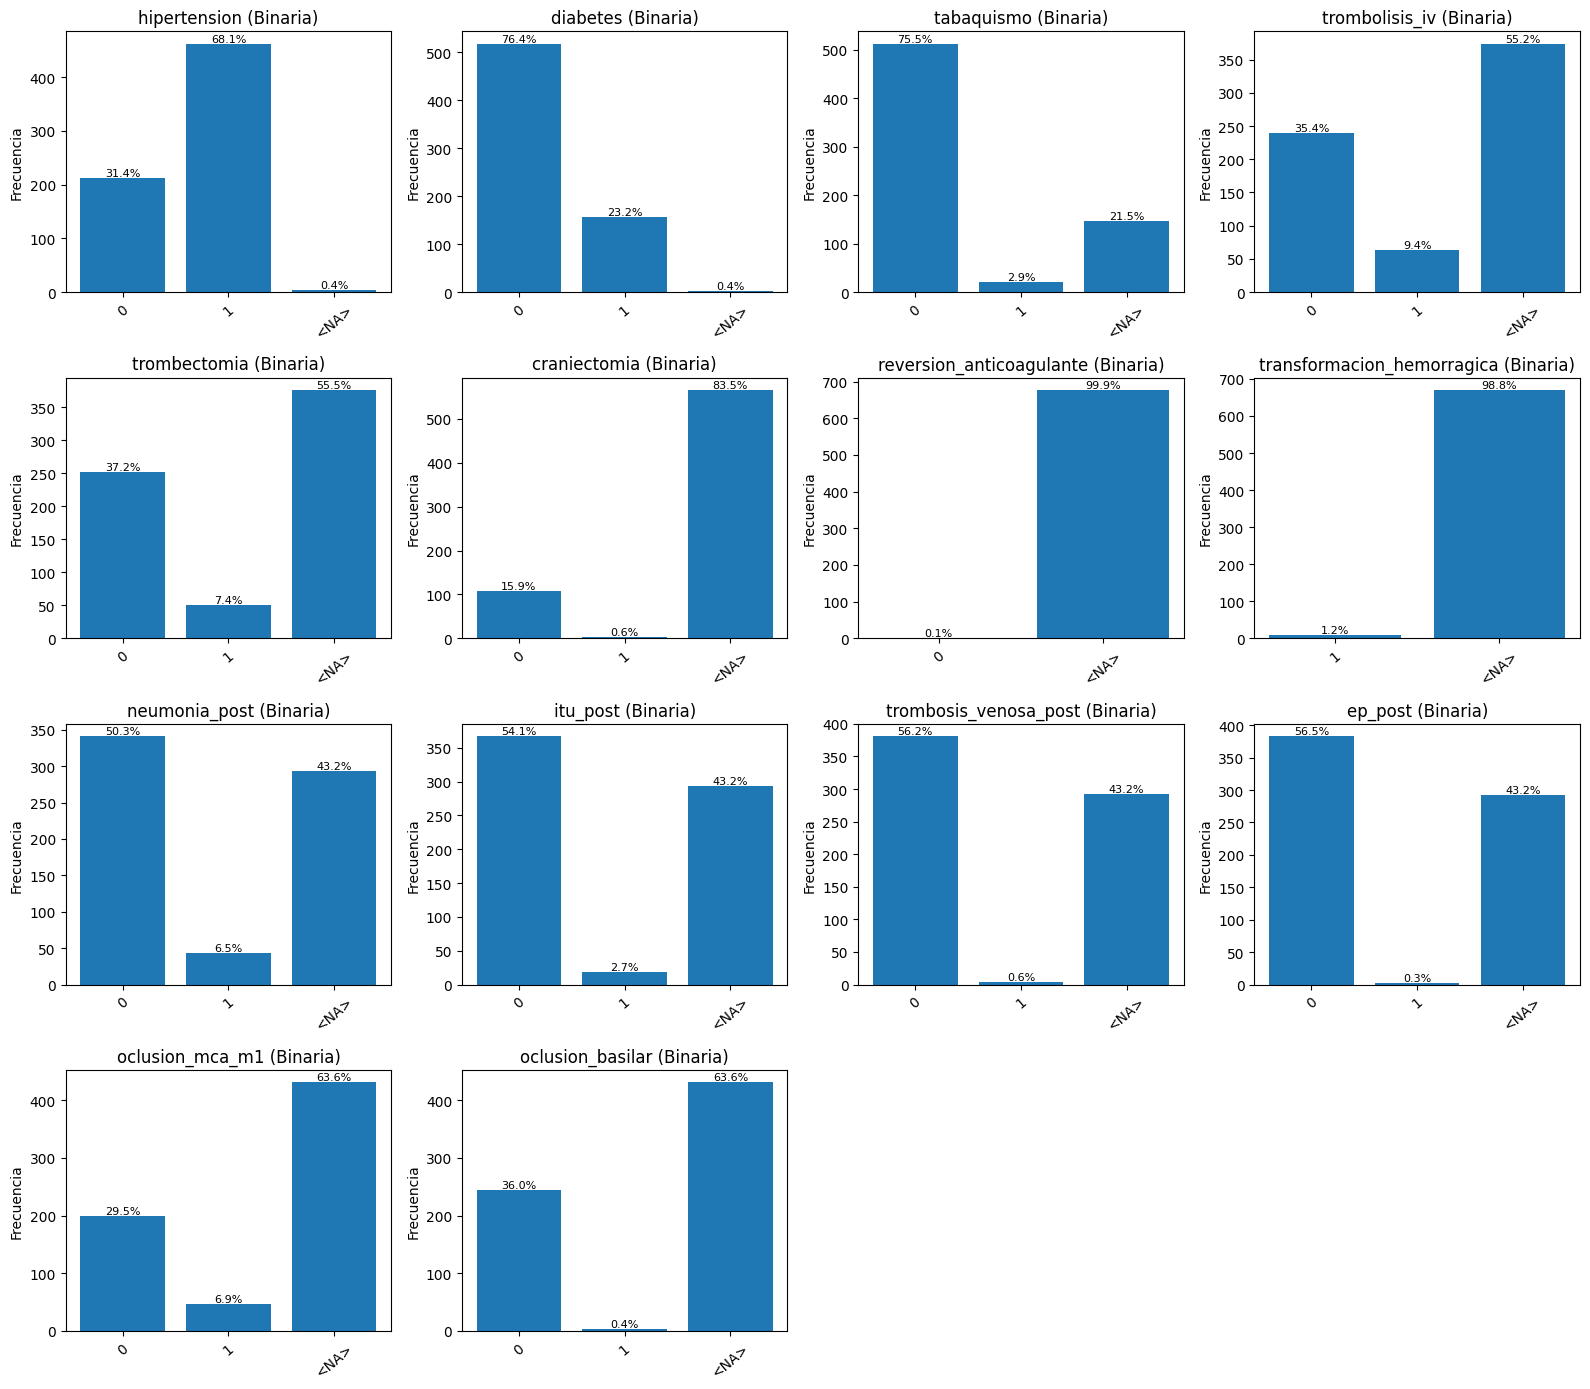

In [107]:
def _present_cols(df, cols):
    """Devuelve solo las columnas que sí existen en el DataFrame (en ese orden)."""
    return [c for c in cols if c in df.columns]

def plot_numeric_pairs(df, cols, cap_q=0.99):
    """
    Para cada variable NUMÉRICA dibuja:
      - Histograma (capado al p{cap_q*100:.0f} para que outliers no aplasten el eje)
      - Boxplot
    Además muestra N, %NaN y (min, p50, p99, max) en el título.
    """
    cols = _present_cols(df, cols)
    if not cols:
        print("No hay numéricas para graficar."); return

    nrows = len(cols)
    fig, axes = plt.subplots(nrows, 2, figsize=(10, 3.2*nrows))
    if nrows == 1: axes = np.array([axes])  # homogeneizar shape

    for i, col in enumerate(cols):
        s = pd.to_numeric(df[col], errors="coerce")
        n_total = len(s)
        n_nan   = s.isna().sum()
        s_no_na = s.dropna()

        if s_no_na.empty:
            axes[i,0].set_visible(False)
            axes[i,1].set_visible(False)
            continue

        # cap visual superior para histograma
        cap = s_no_na.quantile(cap_q)
        s_cap = s_no_na.clip(upper=cap)

        # Histograma
        axes[i,0].hist(s_cap, bins=20, edgecolor="black")
        axes[i,0].set_title(f"Histograma — {col}")
        axes[i,0].set_ylabel("Frecuencia")

        # Boxplot (sin cap)
        axes[i,1].boxplot(s_no_na, vert=False)
        axes[i,1].set_title(f"Boxplot — {col}")

        # Subtítulo informativo
        stats = {
            "min": s_no_na.min(), "p50": s_no_na.quantile(0.50),
            "p99": s_no_na.quantile(0.99), "max": s_no_na.max()
        }
        pct_nan = 100*n_nan/n_total
        axes[i,0].set_xlabel(f"N={n_total-n_nan} (NaN {pct_nan:.1f}%)  |  "
                             f"min={stats['min']:.2f}, p50={stats['p50']:.2f}, "
                             f"p99={stats['p99']:.2f}, max={stats['max']:.2f}")

    fig.tight_layout()
    plt.show()


def plot_bar_grid(df, cols, title_suffix="", ncols=3, sort_by_index=False):
    """
    Grilla de BARRAS para categóricas (nominales/ordinales/binarias):
      - Muestra conteo y % sobre cada barra.
      - Incluye NaN como categoría 'NaN'.
      - sort_by_index=True para ordinales (respeta el orden alfanumérico del índice).
    """
    cols = _present_cols(df, cols)
    if not cols:
        print("No hay categóricas para graficar."); return

    n = len(cols)
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3.5*nrows))
    axes = np.atleast_2d(axes).reshape(nrows, ncols)

    for i, col in enumerate(cols):
        r, c = divmod(i, ncols)

        vc = df[col].value_counts(dropna=False)
        vc.index = vc.index.astype(str).str.replace("nan", "NaN", case=False)
        if sort_by_index:
            vc = vc.sort_index()

        total = vc.sum()
        axes[r,c].bar(vc.index.astype(str), vc.values)
        axes[r,c].set_title(f"{col} {title_suffix}")
        axes[r,c].tick_params(axis="x", rotation=40)
        axes[r,c].set_ylabel("Frecuencia")

        # etiquetas con %
        for x, y in enumerate(vc.values):
            pct = 100*y/total if total else 0
            axes[r,c].text(x, y, f"{pct:.1f}%", ha="center", va="bottom", fontsize=8)

    # Ocultar ejes vacíos
    for j in range(n, nrows*ncols):
        r, c = divmod(j, ncols)
        axes[r,c].set_visible(False)

    fig.tight_layout()
    plt.show()


# ============================
# 1) Numéricas continuas
# ============================
num_cols = [
    "edad","volumen_hipoperfusion","volumen_nucleo",
    "inicio_a_puerta_min","puerta_a_imagen_min","puerta_a_trombolisis_min",
    "puerta_a_puncion_min","puncion_a_reperfusion_min","puerta_a_egreso_min",
    "estancia_dias","estancia_dias_ts","estancia_dias_puerta"
]
plot_numeric_pairs(df_model, num_cols, cap_q=0.99)

# ============================
# 2) Ordinales (usar orden del índice)
# ============================
ord_cols = ["nihss_ingreso","gcs_ingreso","aspects","mrs_previo","mrs_egreso","cha2ds2_vasc"]
plot_bar_grid(df_model, ord_cols, title_suffix="(Ordinal)", ncols=4, sort_by_index=True)

# ============================
# 3) Nominales
# ============================
nominales = ["sexo","fibrilacion_auricular","tipo_acv","destino_egreso","tipo_institucion_egreso"]
plot_bar_grid(df_model, nominales, title_suffix="(Nominal)", ncols=3, sort_by_index=False)

# ============================
# 4) Binarias (0/1/<NA>)
# ============================
binarias = [
    "hipertension","diabetes","tabaquismo",
    "trombolisis_iv","trombectomia","craniectomia","reversion_anticoagulante",
    "transformacion_hemorragica","neumonia_post","itu_post",
    "trombosis_venosa_post","ep_post",
    "oclusion_mca_m1","oclusion_basilar"
]
plot_bar_grid(df_model, binarias, title_suffix="(Binaria)", ncols=4, sort_by_index=True)


In [108]:
# =========================================
# PASO 1: definir grupos de variables
# =========================================
num_cols = [
    "edad","volumen_hipoperfusion","volumen_nucleo",
    "inicio_a_puerta_min","puerta_a_imagen_min","puerta_a_trombolisis_min",
    "puerta_a_puncion_min","puncion_a_reperfusion_min","puerta_a_egreso_min",
    "estancia_dias","estancia_dias_ts","estancia_dias_puerta"
]
num_cols = [c for c in num_cols if c in df_model.columns]

ord_cols = ["nihss_ingreso","gcs_ingreso","aspects","mrs_previo","mrs_egreso","cha2ds2_vasc"]
ord_cols = [c for c in ord_cols if c in df_model.columns]

nominales = ["sexo","fibrilacion_auricular","tipo_acv","destino_egreso","tipo_institucion_egreso"]
nominales = [c for c in nominales if c in df_model.columns]

binarias = [
    "hipertension","diabetes","tabaquismo",
    "trombolisis_iv","trombectomia","craniectomia","reversion_anticoagulante",
    "transformacion_hemorragica","neumonia_post","itu_post",
    "trombosis_venosa_post","ep_post",
    "oclusion_mca_m1","oclusion_basilar"
]
binarias = [c for c in binarias if c in df_model.columns]


In [109]:
# =========================================
# PASO 2: tabla de faltantes por columna
# =========================================
faltantes = (
    df_model.isna()
            .mean()
            .mul(100)
            .sort_values(ascending=True)
            .rename("pct_nan")
            .to_frame()
)
faltantes["n_nan"] = (df_model.isna().sum())
faltantes["n_total"] = len(df_model)
faltantes["pct_completo"] = 100 - faltantes["pct_nan"]
print(">> Faltantes por columna (ordenado desc):")
display(faltantes.head(30))


>> Faltantes por columna (ordenado desc):


,pct_nan,n_nan,n_total,pct_completo
id_caso,0.000000,0,678,100.000000
edad,0.000000,0,678,100.000000
sexo,0.000000,0,678,100.000000
tipo_acv,0.000000,0,678,100.000000
destino_egreso,0.000000,0,678,100.000000
hipertension,0.442478,3,678,99.557522
diabetes,0.442478,3,678,99.557522
puerta_a_egreso_min,2.359882,16,678,97.640118
estancia_dias,2.359882,16,678,97.640118
estancia_dias_puerta,2.359882,16,678,97.640118


In [110]:
# =========================================
# PASO 3: resumen de NUMÉRICAS continuas
# =========================================
def summarize_numeric(df, cols, positive_only=False):
    out = []
    for c in cols:
        s = pd.to_numeric(df[c], errors="coerce")
        n = s.notna().sum()
        row = {
            "variable": c,
            "n": n,
            "n_nan": s.isna().sum(),
            "pct_nan": s.isna().mean()*100,
        }
        if n > 0:
            if positive_only:
                negs = (s < 0).sum()
                row["n_negativos"] = int(negs)
                row["pct_negativos"] = (negs/n)*100
            row.update({
                "media": s.mean(),
                "mediana": s.median(),
                "std": s.std(),
                "p25": s.quantile(0.25),
                "p75": s.quantile(0.75),
                "IQR": s.quantile(0.75) - s.quantile(0.25),
                "min": s.min(),
                "p1": s.quantile(0.01),
                "p99": s.quantile(0.99),
                "max": s.max(),
            })
        out.append(row)
    return pd.DataFrame(out).set_index("variable").sort_index()

# Para tiempos/estancias queremos también contar negativos:
num_summary = summarize_numeric(df_model, num_cols, positive_only=True)
print(">> Resumen numéricas continuas:")
display(num_summary)


>> Resumen numéricas continuas:


,n,n_nan,pct_nan,n_negativos,pct_negativos,media,mediana,std,p25,p75,IQR,min,p1,p99,max
variable,,,,,,,,,,,,,,,
edad,678,0,0.000000,0,0.0,67.668142,69.00,15.684214,58.00,79.000,21.000,16.00,23.310,94.0000,98.00
estancia_dias,662,16,2.359882,0,0.0,19.348686,0.01,52.972250,0.00,0.020,0.020,0.00,0.000,243.5815,303.69
estancia_dias_puerta,662,16,2.359882,0,0.0,0.006813,0.00,0.010348,0.00,0.010,0.010,0.00,0.000,0.0500,0.08
estancia_dias_ts,99,579,85.398230,0,0.0,129.338990,121.60,67.499831,91.06,182.245,91.185,0.04,28.411,274.6134,303.69
inicio_a_puerta_min,553,125,18.436578,0,0.0,330.296564,216.00,327.636893,94.00,450.000,356.000,0.00,0.000,1337.7600,1440.00
puerta_a_egreso_min,662,16,2.359882,0,0.0,11.196375,6.50,13.698751,3.00,14.000,11.000,0.00,0.000,67.7800,122.00
puerta_a_imagen_min,561,117,17.256637,0,0.0,46.235294,33.00,40.628301,23.00,51.000,28.000,0.00,5.000,212.6000,237.00
puerta_a_puncion_min,47,631,93.067847,0,0.0,149.148936,136.00,87.592430,92.00,184.000,92.000,21.00,37.100,468.2600,546.00
puerta_a_trombolisis_min,65,613,90.412979,0,0.0,59.276923,52.00,26.650227,43.00,71.000,28.000,24.00,24.640,148.0800,150.00


In [111]:
def summarize_ordinal(df, cols):
    compact = []
    freqs = {}
    for c in cols:
        s = df[c]

        # Si es categórica -> usar códigos; si no, pasar a numérico
        if hasattr(s, "cat"):  
            codes = s.cat.codes.replace(-1, np.nan)  # -1 son NaN
        else:
            codes = pd.to_numeric(s, errors="coerce")

        compact.append({
            "variable": c,
            "n": s.notna().sum(),
            "n_nan": s.isna().sum(),
            "pct_nan": round(s.isna().mean()*100, 1),
            "moda": s.mode(dropna=True).iloc[0] if not s.mode(dropna=True).empty else np.nan,
            "mediana_cod": np.nanmedian(codes) if codes.notna().any() else np.nan
        })
        freqs[c] = s.value_counts(dropna=False).to_frame(name="frecuencia")

    return pd.DataFrame(compact), freqs

ord_cols = ["nihss_ingreso","gcs_ingreso","aspects","mrs_previo","mrs_egreso","cha2ds2_vasc"]
resumen_ord, frec_ord = summarize_ordinal(df_model, ord_cols)

print("Resumen ordinales:\n", resumen_ord)
print("\nEjemplo de frecuencias (nihss_ingreso):\n", frec_ord["nihss_ingreso"])


Resumen ordinales:
         variable    n  n_nan  pct_nan  moda  mediana_cod
0  nihss_ingreso  533    145     21.4     2          7.0
1    gcs_ingreso  355    323     47.6    15         12.0
2        aspects  113    565     83.3    10         10.0
3     mrs_previo  435    243     35.8     0          0.0
4     mrs_egreso  170    508     74.9     6          6.0
5   cha2ds2_vasc   93    585     86.3     3          4.0

Ejemplo de frecuencias (nihss_ingreso):
                frecuencia
nihss_ingreso            
NaN                   145
2                      60
3                      52
4                      45
1                      29
0                      28
8                      27
5                      26
9                      23
10                     22
7                      22
12                     20
6                      19
20                     17
18                     14
15                     14
13                     14
11                     13
14                 

In [112]:
def summarize_nominal(df, cols):
    compact = []
    freqs = {}
    for c in cols:
        s = df[c]
        compact.append({
            "variable": c,
            "n": s.notna().sum(),
            "n_nan": s.isna().sum(),
            "pct_nan": round(s.isna().mean()*100, 1),
            "moda": s.mode(dropna=True).iloc[0] if not s.mode(dropna=True).empty else np.nan,
            "n_categorias": s.nunique(dropna=True)
        })
        freqs[c] = s.value_counts(dropna=False).to_frame(name="frecuencia")
    return pd.DataFrame(compact), freqs

# Nominales
nominales = ["sexo","fibrilacion_auricular","tipo_acv","destino_egreso","tipo_institucion_egreso"]
resumen_nom, frec_nom = summarize_nominal(df_model, nominales)

print("Resumen nominales:\n", resumen_nom)
print("\nEjemplo de frecuencias (sexo):\n", frec_nom["sexo"])

# Binarias
binarias = [
    "hipertension","diabetes","tabaquismo",
    "trombolisis_iv","trombectomia","craniectomia","reversion_anticoagulante",
    "transformacion_hemorragica","neumonia_post","itu_post",
    "trombosis_venosa_post","ep_post","oclusion_mca_m1","oclusion_basilar"
]
resumen_bin, frec_bin = summarize_nominal(df_model, binarias)

print("Resumen binarias:\n", resumen_bin)
print("\nEjemplo de frecuencias (hipertension):\n", frec_bin["hipertension"])


Resumen nominales:
                   variable    n  n_nan  pct_nan            moda  n_categorias
0                     sexo  678      0      0.0          female             2
1    fibrilacion_auricular  373    305     45.0           no AF             4
2                 tipo_acv  678      0      0.0        ischemic             7
3           destino_egreso  678      0      0.0            home             3
4  tipo_institucion_egreso    9    669     98.7  other hospital             2

Ejemplo de frecuencias (sexo):
         frecuencia
sexo              
female         364
male           314
Resumen binarias:
                       variable    n  n_nan  pct_nan  moda  n_categorias
0                 hipertension  675      3      0.4     1             2
1                     diabetes  675      3      0.4     0             2
2                   tabaquismo  532    146     21.5     0             2
3               trombolisis_iv  304    374     55.2     0             2
4                 trombe

In [113]:
def diagnostico_calidad(df):
    resumen = []
    for c in df.columns:
        s = df[c]
        resumen.append({
            "variable": c,
            "tipo": str(s.dtype),
            "n": s.notna().sum(),
            "n_nan": s.isna().sum(),
            "pct_nan": round(s.isna().mean()*100, 1),
            "n_unicos": s.nunique(dropna=True)
        })
    return pd.DataFrame(resumen).sort_values("pct_nan", ascending=False)

calidad = diagnostico_calidad(df_model)
print("Diagnóstico de calidad de datos:\n", calidad.head(50))


Diagnóstico de calidad de datos:
                       variable            tipo    n  n_nan  pct_nan  n_unicos
28    reversion_anticoagulante           Int64    1    677     99.9         1
14              volumen_nucleo         float64    4    674     99.4         4
13       volumen_hipoperfusion         float64    4    674     99.4         4
29  transformacion_hemorragica           Int64    8    670     98.8         1
36     tipo_institucion_egreso        category    9    669     98.7         2
21   puncion_a_reperfusion_min         float64   46    632     93.2        17
20        puerta_a_puncion_min         float64   47    631     93.1        41
19    puerta_a_trombolisis_min         float64   65    613     90.4        45
7                 cha2ds2_vasc        category   93    585     86.3         9
37            estancia_dias_ts         float64   99    579     85.4        94
27                craniectomia           Int64  112    566     83.5         2
5                      aspects

# Análisis de Correlación: Estancia vs Variables Clínicas

En esta sección exploramos cómo se relaciona la **estancia hospitalaria (`estancia_dias`)** con las demás variables disponibles en la base de datos.  
Se realiza el análisis en tres pasos:

---

### 🔹 Paso 1. Correlaciones con variables numéricas
- Se calcula la **correlación de Pearson** (relación lineal) y la **correlación de Spearman** (relación monótona) entre la estancia y cada variable numérica.  
- Se incluye también el número de observaciones válidas en cada correlación.  
- Esto nos ayuda a identificar variables clínicas y de tiempos que se asocian de forma directa con la duración de la estancia.

---

### 🔹 Paso 2. Comparaciones con variables categóricas
- Para las variables **categóricas** (sexo, tipo de ACV, destino de egreso, fibrilación auricular, etc.), se utilizan **boxplots** que muestran la distribución de la estancia en cada grupo.  
- Estos gráficos permiten identificar diferencias en la mediana y la dispersión de los días de estancia entre categorías.

---

### 🔹 Paso 3. Tablas de resumen por categorías
- Se generan tablas con **conteo, media, mediana y desviación estándar** de la estancia para cada categoría.  
- Esto facilita cuantificar el efecto que puede tener cada factor categórico sobre la duración de la hospitalización.

---

📌 Con este análisis se busca tener una primera aproximación a las variables que podrían predecir o explicar las diferencias en la estancia hospitalaria.  
Posteriormente, estos hallazgos podrán servir como base para análisis multivariados o modelos predictivos.


In [114]:
# Definir la variable dependiente
y = "estancia_dias"

# Selección de variables numéricas candidatas (excluyendo la misma estancia)
num_cols = df_model.select_dtypes(include=["float64","int64","Int64"]).columns.tolist()
num_cols = [c for c in num_cols if c != y]

# Calcular correlaciones
corrs = {}
for col in num_cols:
    corrs[col] = {
        "pearson": df_model[[y, col]].corr(method="pearson").iloc[0,1],
        "spearman": df_model[[y, col]].corr(method="spearman").iloc[0,1],
        "n": df_model[[y, col]].dropna().shape[0]   # nº de observaciones usadas
    }

df_corrs = pd.DataFrame(corrs).T.sort_values("pearson", ascending=False)
print(df_corrs)


                             pearson  spearman      n
estancia_dias_ts            1.000000  1.000000   99.0
volumen_nucleo              0.824099  0.774597    4.0
puerta_a_puncion_min        0.390668  0.125403   46.0
ep_post                     0.109298  0.106521  374.0
craniectomia                0.091092  0.134692  108.0
puncion_a_reperfusion_min   0.076633  0.211719   44.0
hipertension                0.024822  0.040705  659.0
inicio_a_puerta_min         0.008590  0.049391  548.0
diabetes                    0.008220 -0.010175  659.0
oclusion_basilar            0.005590 -0.032737  240.0
puerta_a_imagen_min        -0.003689  0.063765  558.0
edad                       -0.005232  0.036674  662.0
oclusion_mca_m1            -0.016033  0.052103  240.0
trombosis_venosa_post      -0.034647  0.053676  374.0
trombectomia               -0.038283  0.088396  294.0
itu_post                   -0.044604  0.079694  374.0
trombolisis_iv             -0.046272 -0.011363  296.0
tabaquismo                 -

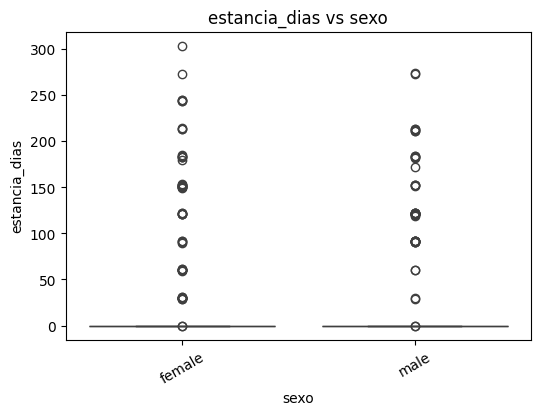

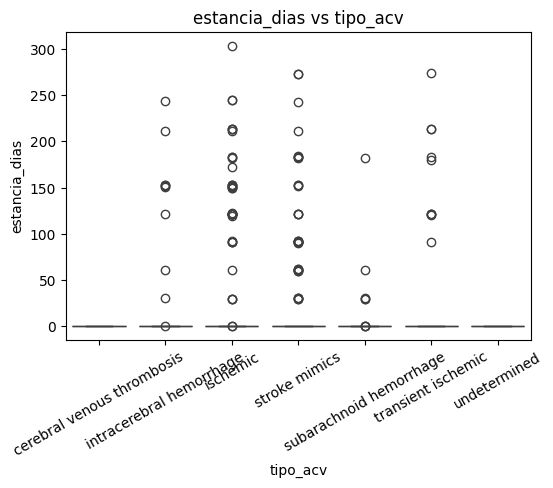

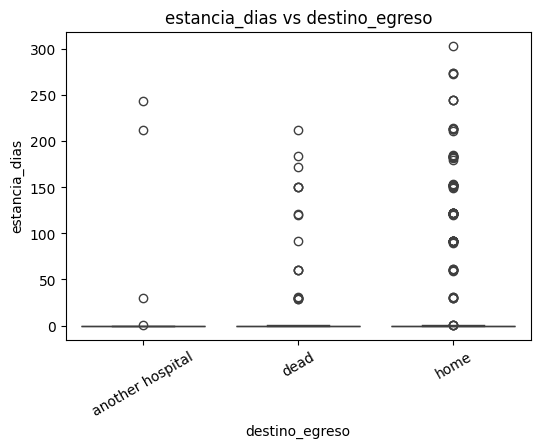

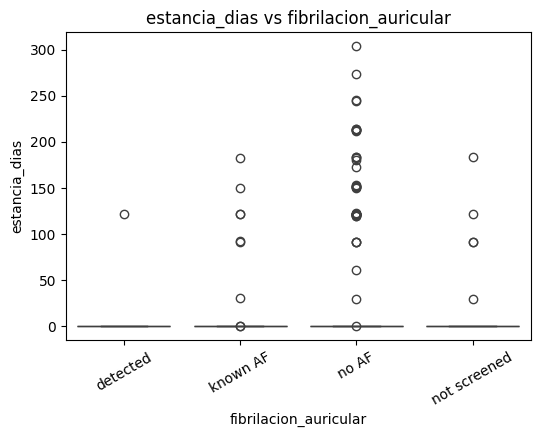

In [115]:
# Ejemplo gráfico para una variable categórica
cat_vars = ["sexo","tipo_acv","destino_egreso","fibrilacion_auricular"]  # ajusta según tu df

for col in cat_vars:
    if col in df_model.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df_model, x=col, y=y)
        plt.title(f"{y} vs {col}")
        plt.xticks(rotation=30)
        plt.show()


In [116]:
# Variable dependiente
y = "estancia_dias"

# Variables categóricas a analizar
cat_vars = ["sexo", "tipo_acv", "destino_egreso", "fibrilacion_auricular"]

# Diccionario de resultados
resumenes = {}

for col in cat_vars:
    if col in df_model.columns:
        # Agrupar y calcular estadísticos básicos
        resumen = (
            df_model.groupby(col, observed=True)[y]
            .agg(["count", "mean", "median", "std"])
            .round(2)
        )
        resumenes[col] = resumen
        print(f"\n{col}\n", resumen)



sexo
         count   mean  median    std
sexo                               
female    356  19.19    0.01  53.69
male      306  19.53    0.01  52.21

tipo_acv
                             count   mean  median    std
tipo_acv                                               
cerebral venous thrombosis      6   0.01    0.01   0.01
intracerebral hemorrhage       54  23.62    0.01  59.20
ischemic                      296  18.33    0.01  52.35
stroke mimics                 185  22.35    0.00  54.56
subarachnoid hemorrhage        63   5.27    0.01  24.70
transient ischemic             55  29.82    0.00  68.07
undetermined                    3   0.01    0.01   0.01

destino_egreso
                   count   mean  median    std
destino_egreso                               
another hospital     29  16.71    0.00  58.78
dead                123  13.90    0.01  41.05
home                510  20.81    0.01  55.14

fibrilacion_auricular
                        count   mean  median    std
fibrilacion_

In [117]:
# ==============================
# 1) Filtrar base quitando mimics, TIA y undetermined
# ==============================
df_filtrado = df_model[
    ~df_model["tipo_acv"].isin(["stroke mimics", "transient ischemic", "undetermined"])
].copy()

print("Shape después de filtrar:", df_filtrado.shape)
print("Valores únicos en tipo_acv:", df_filtrado["tipo_acv"].unique())

# ==============================
# 2) Dividir en dos subconjuntos
# ==============================
# Isquémicos
df_isquemicos = df_filtrado[df_filtrado["tipo_acv"] == "ischemic"].copy()

# Hemorrágicos: HIC + HSA
df_hemorragicos = df_filtrado[
    df_filtrado["tipo_acv"].isin(["intracerebral hemorrhage", "subarachnoid hemorrhage"])
].copy()

print("\nIsquémicos:", df_isquemicos.shape)
print("Hemorrágicos:", df_hemorragicos.shape)


Shape después de filtrar: (430, 40)
Valores únicos en tipo_acv: ['ischemic', 'subarachnoid hemorrhage', 'intracerebral hemorrhage', 'cerebral venous thrombosis']
Categories (7, object): ['cerebral venous thrombosis', 'intracerebral hemorrhage', 'ischemic', 'stroke mimics', 'subarachnoid hemorrhage', 'transient ischemic', 'undetermined']

Isquémicos: (304, 40)
Hemorrágicos: (120, 40)


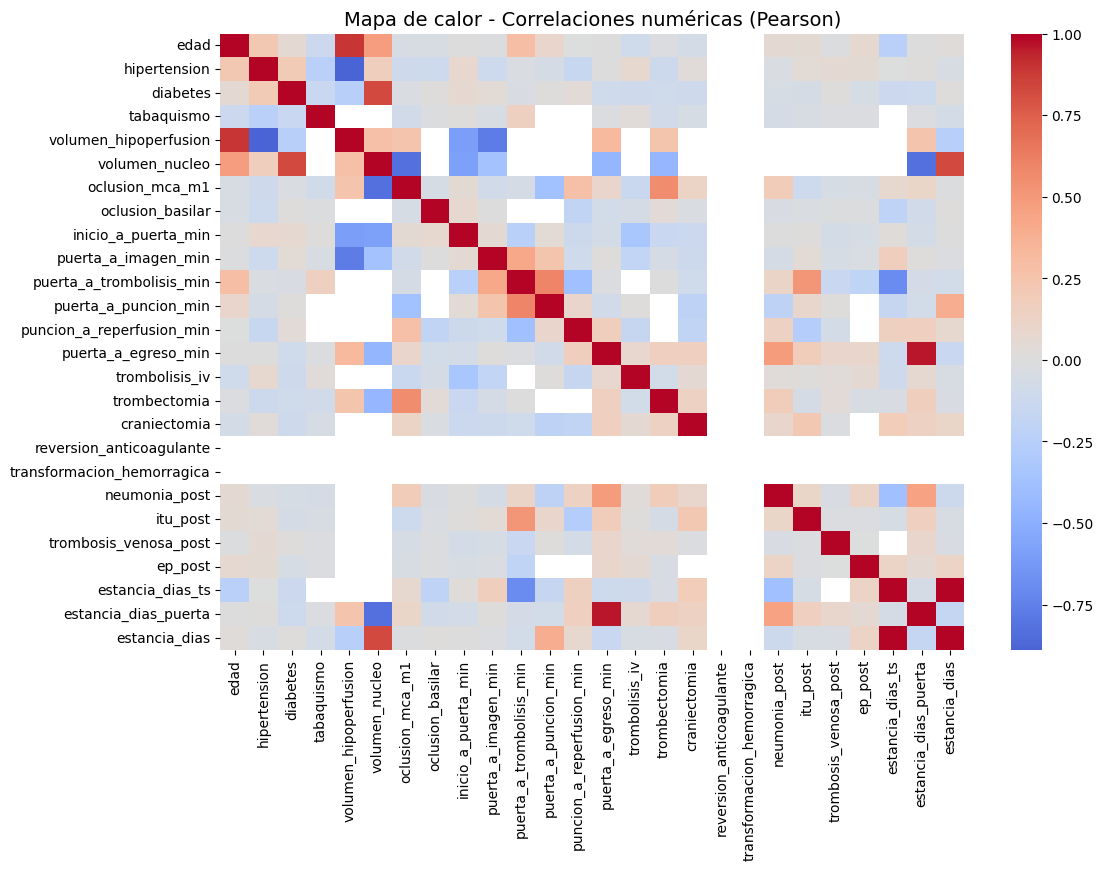

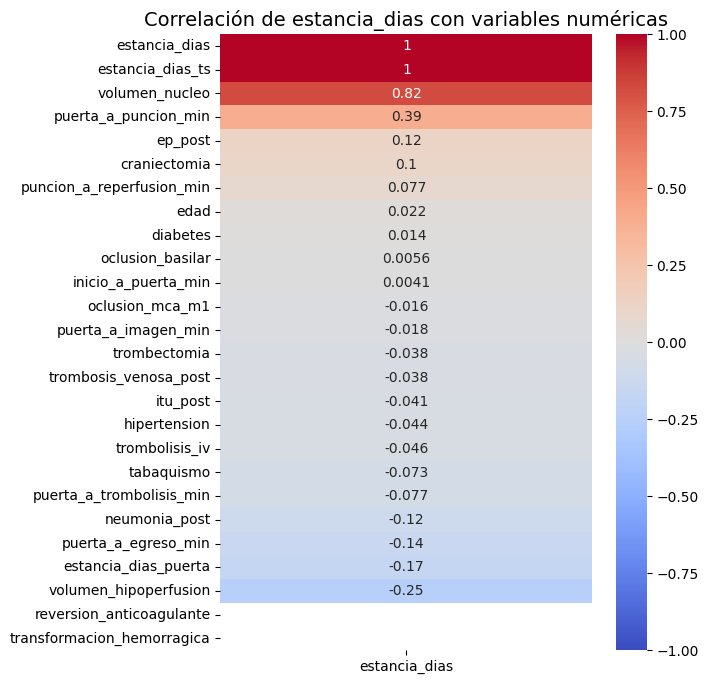

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo variables numéricas (excluimos id's, fechas, categóricas)
num_cols = df_isquemicos.select_dtypes(include=["float64","int64","Int64"]).columns.tolist()

# Calculamos la matriz de correlaciones de Pearson
corr_matrix = df_isquemicos[num_cols].corr(method="pearson")

# Mapa de calor general
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Mapa de calor - Correlaciones numéricas (Pearson)", fontsize=14)
plt.show()

# ===========================
# Zoom: correlación con estancia
# ===========================
target = "estancia_dias"
if target in corr_matrix.columns:
    plt.figure(figsize=(6,8))
    sns.heatmap(
        corr_matrix[[target]].sort_values(by=target, ascending=False),
        annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1
    )
    plt.title(f"Correlación de {target} con variables numéricas", fontsize=14)
    plt.show()


In [119]:
df_isquemicos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 1 to 677
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_caso                     304 non-null    object        
 1   edad                        304 non-null    int64         
 2   sexo                        304 non-null    category      
 3   nihss_ingreso               278 non-null    category      
 4   gcs_ingreso                 174 non-null    category      
 5   aspects                     113 non-null    category      
 6   fibrilacion_auricular       299 non-null    category      
 7   cha2ds2_vasc                68 non-null     category      
 8   hipertension                303 non-null    Int64         
 9   diabetes                    303 non-null    Int64         
 10  tabaquismo                  260 non-null    Int64         
 11  mrs_previo                  224 non-null    category      
 12 

In [120]:
# Columnas con demasiados nulos o sin aporte
cols_drop = [
    "volumen_hipoperfusion",
    "volumen_nucleo",
    "reversion_anticoagulante",
    "tipo_institucion_egreso",
    "estancia_dias_ts",
    "id_caso",
    "cha2ds2_vasc",
    "estancia_dias_puerta",
    "inicio_a_puerta_min",
    "puerta_a_imagen_min",
    "puerta_a_trombolisis_min",
    "puerta_a_puncion_min",
    "puncion_a_reperfusion_min",
    "ingreso_hospital",
    "fecha_egreso",
    "puerta_a_egreso_min",
    "tipo_acv"
]

df_isquemicos = df_isquemicos.drop(columns=cols_drop)

print("Shape final:", df_isquemicos.shape)
print("Columnas actuales:", df_isquemicos.columns.tolist())


Shape final: (304, 23)
Columnas actuales: ['edad', 'sexo', 'nihss_ingreso', 'gcs_ingreso', 'aspects', 'fibrilacion_auricular', 'hipertension', 'diabetes', 'tabaquismo', 'mrs_previo', 'oclusion_mca_m1', 'oclusion_basilar', 'trombolisis_iv', 'trombectomia', 'craniectomia', 'transformacion_hemorragica', 'neumonia_post', 'itu_post', 'trombosis_venosa_post', 'ep_post', 'mrs_egreso', 'destino_egreso', 'estancia_dias']


In [121]:
# Eliminar filas con estancia_dias nula
print("Antes:", df_isquemicos.shape)
df_isquemicos = df_isquemicos.dropna(subset=["estancia_dias"])
print("Después:", df_isquemicos.shape)

Antes: (304, 23)
Después: (296, 23)


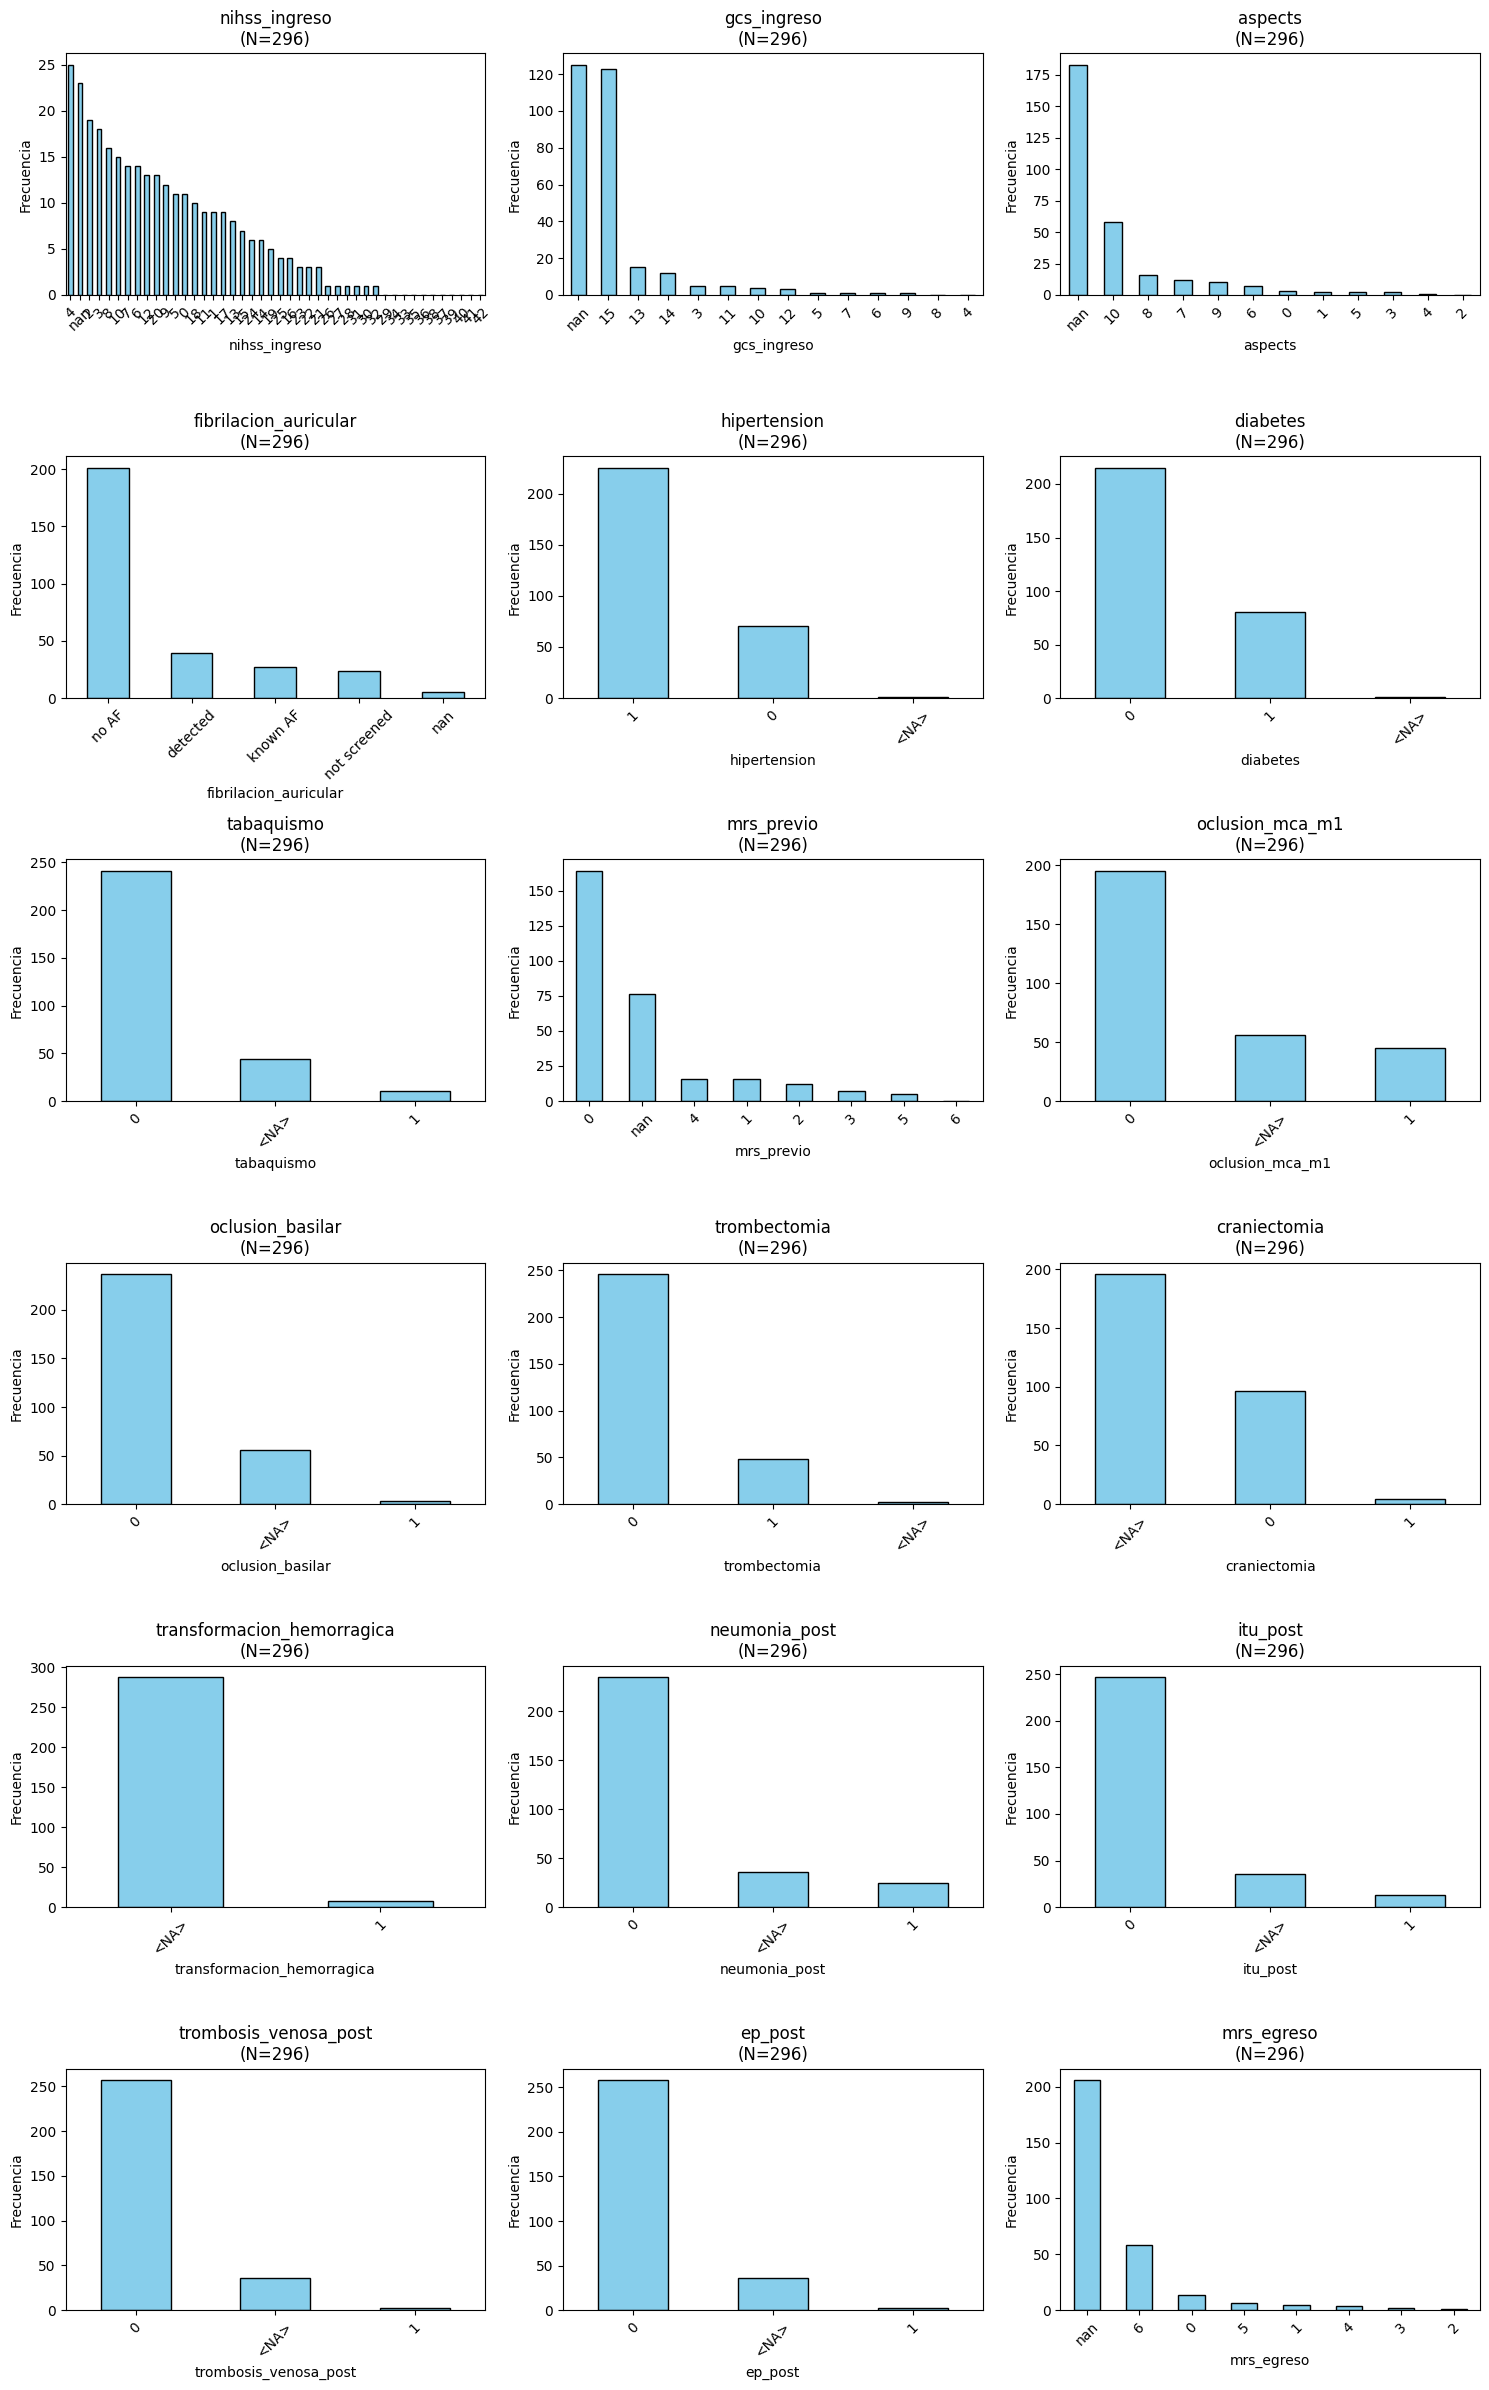

In [122]:
import matplotlib.pyplot as plt

# Seleccionamos todas las columnas con algún NA
cols_na = [c for c in df_isquemicos.columns if df_isquemicos[c].isna().sum() > 0]

n = len(cols_na)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4*nrows))

for i, col in enumerate(cols_na):
    r, c = divmod(i, ncols)
    ax = axes[r, c] if nrows > 1 else axes[c]

    # Conteo de valores reales (incluye NA explícito como categoría)
    vc = df_isquemicos[col].value_counts(dropna=False)

    vc.plot(kind="bar", ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(f"{col}\n(N={df_isquemicos.shape[0]})")
    ax.set_ylabel("Frecuencia")
    ax.tick_params(axis="x", rotation=45)

# Apagar ejes vacíos
for j in range(i+1, nrows*ncols):
    r, c = divmod(j, ncols)
    axes[r, c].set_visible(False)

plt.tight_layout()
plt.show()



## **IMPUTACIÓN DE DATOS OJO** ##

En este punto para poder correr el análisis multivariado se realiza imputación por moda para las variables binarias

In [123]:
# ============================
# Imputación por MODA
# ============================

# Seleccionamos solo variables categóricas y binarias
cat_bin_cols = df_isquemicos.select_dtypes(include=["category", "Int64"]).columns

for col in cat_bin_cols:
    if df_isquemicos[col].isna().sum() > 0:  # solo si tiene NA
        moda = df_isquemicos[col].mode(dropna=True)[0]  # moda
        df_isquemicos[col] = df_isquemicos[col].fillna(moda)
        print(f"Imputada {col} con moda: {moda}")

# Chequeo rápido de que ya no hay nulos en esas
print("\nNulos restantes en categóricas/binarias:")
print(df_isquemicos[cat_bin_cols].isna().sum())


Imputada nihss_ingreso con moda: 4
Imputada gcs_ingreso con moda: 15
Imputada aspects con moda: 10
Imputada fibrilacion_auricular con moda: no AF
Imputada hipertension con moda: 1
Imputada diabetes con moda: 0
Imputada tabaquismo con moda: 0
Imputada mrs_previo con moda: 0
Imputada oclusion_mca_m1 con moda: 0
Imputada oclusion_basilar con moda: 0
Imputada trombectomia con moda: 0
Imputada craniectomia con moda: 0
Imputada transformacion_hemorragica con moda: 1
Imputada neumonia_post con moda: 0
Imputada itu_post con moda: 0
Imputada trombosis_venosa_post con moda: 0
Imputada ep_post con moda: 0
Imputada mrs_egreso con moda: 6

Nulos restantes en categóricas/binarias:
edad                          0
sexo                          0
nihss_ingreso                 0
gcs_ingreso                   0
aspects                       0
fibrilacion_auricular         0
hipertension                  0
diabetes                      0
tabaquismo                    0
mrs_previo                    0
oclu

In [124]:
df_isquemicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 1 to 677
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   edad                        296 non-null    int64   
 1   sexo                        296 non-null    category
 2   nihss_ingreso               296 non-null    category
 3   gcs_ingreso                 296 non-null    category
 4   aspects                     296 non-null    category
 5   fibrilacion_auricular       296 non-null    category
 6   hipertension                296 non-null    Int64   
 7   diabetes                    296 non-null    Int64   
 8   tabaquismo                  296 non-null    Int64   
 9   mrs_previo                  296 non-null    category
 10  oclusion_mca_m1             296 non-null    Int64   
 11  oclusion_basilar            296 non-null    Int64   
 12  trombolisis_iv              296 non-null    Int64   
 13  trombectomia             

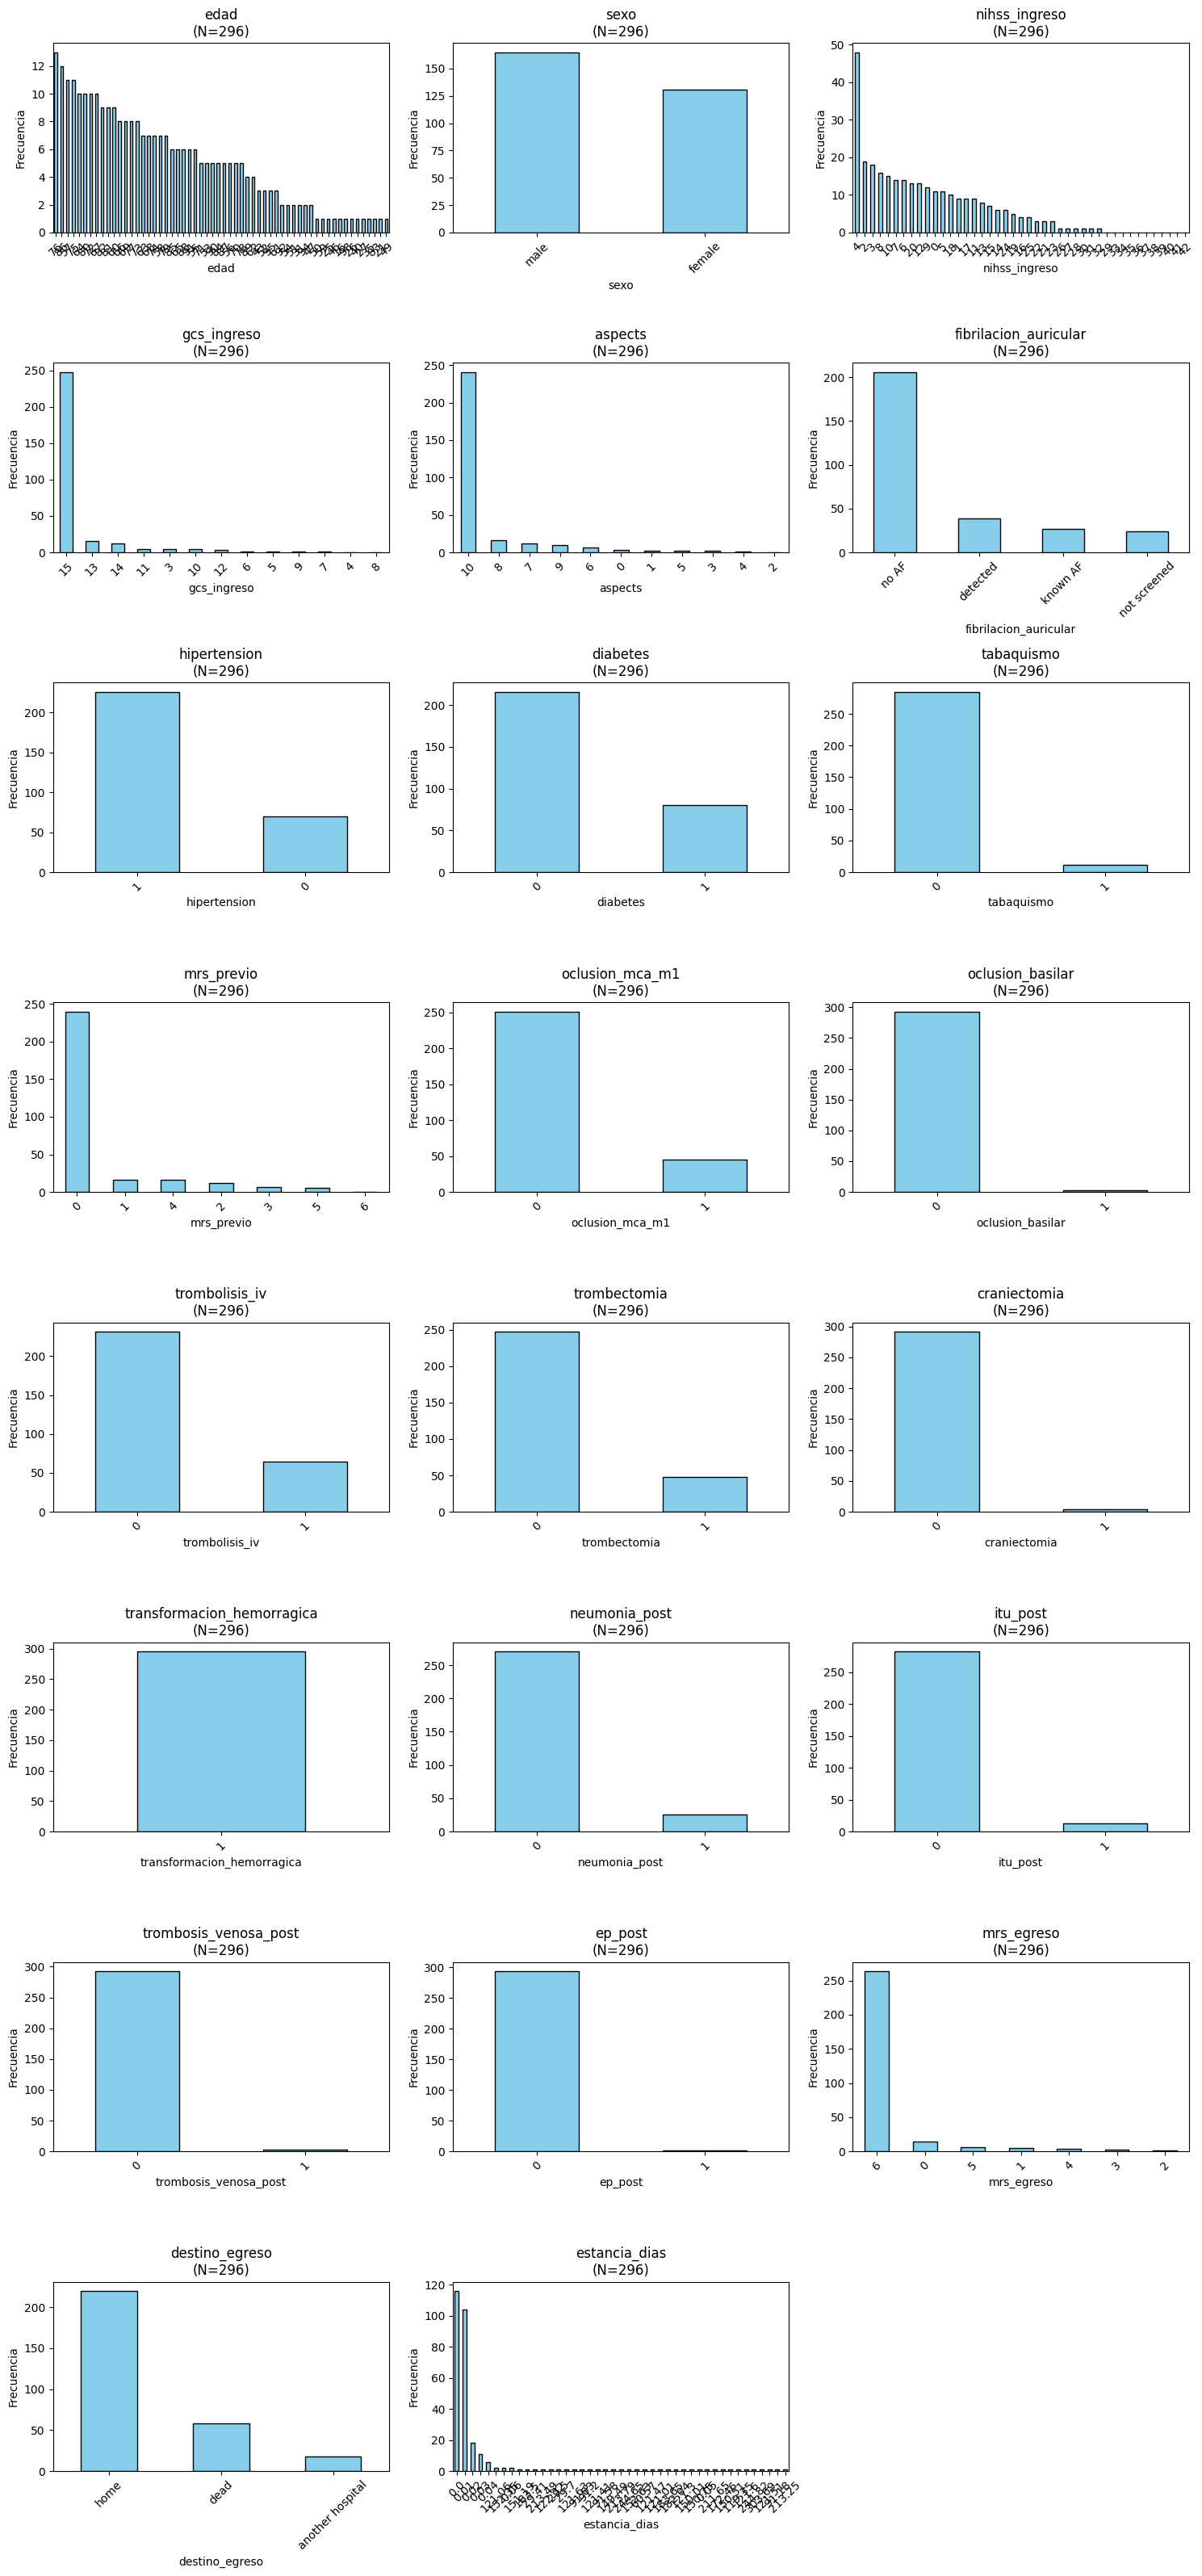

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Tomamos todas las columnas (si quieres filtrar, cambia aquí)
cols_all = df_isquemicos.columns.tolist()

n = len(cols_all)
ncols = 3
nrows = (n + ncols - 1) // ncols  # número de filas

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4*nrows))
axes = np.atleast_1d(axes).ravel()  # vectorizamos los ejes

for idx, col in enumerate(cols_all):
    ax = axes[idx]
    vc = df_isquemicos[col].value_counts(dropna=False)
    vc.plot(kind="bar", ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(f"{col}\n(N={df_isquemicos.shape[0]})")
    ax.set_ylabel("Frecuencia")
    ax.tick_params(axis="x", rotation=45)

# ocultar ejes sobrantes si los hay
for ax in axes[len(cols_all):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


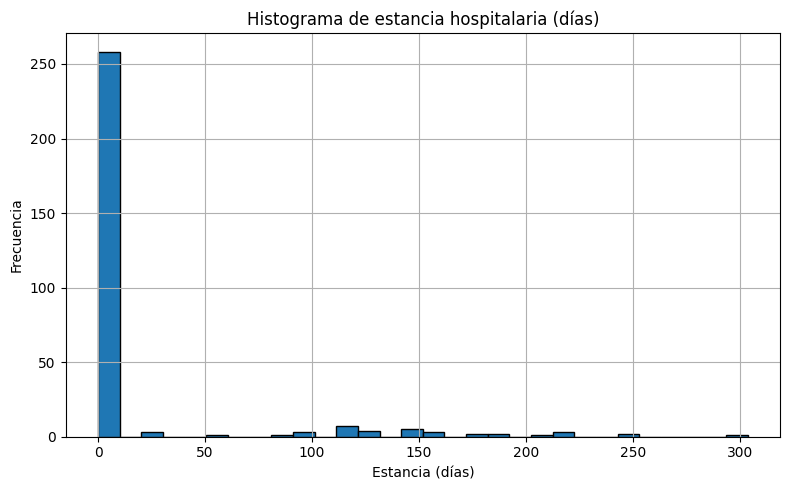

In [139]:
import matplotlib.pyplot as plt

# Histograma de estancia_dias
plt.figure(figsize=(8,5))
df_isquemicos["estancia_dias"].dropna().hist(bins=30, edgecolor="black")
plt.title("Histograma de estancia hospitalaria (días)")
plt.xlabel("Estancia (días)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

## **Análisis multivariado** ##

In [126]:
# Target
y = df_isquemicos["estancia_dias"]

# Variables predictoras (quitamos id y el propio target)
X = df_isquemicos.drop(columns=["id_caso","estancia_dias"], errors="ignore")


In [127]:
# Identificar variables categóricas
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()

# One-hot encoding (con drop_first para evitar colinealidad)
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [128]:
X = X.apply(pd.to_numeric, errors="coerce").astype("float64")


In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Entrenar modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicciones
y_pred = lr.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE: ", round(mae,2))
print("RMSE:", round(rmse,2))
print("R²:  ", round(r2,3))


MAE:  39.42
RMSE: 64.5
R²:   -0.366


In [131]:
coef_df = pd.DataFrame({
    "variable": X.columns,
    "coef": lr.coef_
}).sort_values("coef", ascending=False)

print("Top positivos:\n", coef_df.head(10))
print("\nTop negativos:\n", coef_df.tail(10))


Top positivos:
             variable        coef
13           ep_post  170.660464
77         aspects_9   70.601748
21   nihss_ingreso_7   54.107592
29  nihss_ingreso_15   49.804618
31  nihss_ingreso_17   45.431599
27  nihss_ingreso_13   40.044304
74         aspects_6   38.990234
78        aspects_10   37.739294
30  nihss_ingreso_16   36.333654
91      mrs_egreso_4   35.120347

Top negativos:
                  variable       coef
90           mrs_egreso_3 -26.300501
93           mrs_egreso_6 -27.715995
35       nihss_ingreso_21 -29.779558
10          neumonia_post -30.104961
84           mrs_previo_3 -30.342221
37       nihss_ingreso_23 -32.802294
88           mrs_egreso_1 -38.809568
89           mrs_egreso_2 -39.764349
12  trombosis_venosa_post -54.366503
92           mrs_egreso_5 -70.521373


In [132]:
# ===============================
# Comparación: Lineal vs Ridge vs Lasso
# ===============================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------- 1) Preparar X, y --------
y = df_isquemicos["estancia_dias"].astype(float)

X = df_isquemicos.drop(columns=["id_caso","estancia_dias"], errors="ignore")
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X = X.apply(pd.to_numeric, errors="coerce").astype("float64")

# (por si quedó algún NaN inesperado después del get_dummies)
mask_ok = y.notna() & X.notna().all(axis=1)
X, y = X.loc[mask_ok], y.loc[mask_ok]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------- 2) Definir modelos --------
# Lineal (sin escalado)
linreg = Pipeline(steps=[("lr", LinearRegression())])

# Ridge con CV + escalado
ridge = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5))
])

# Lasso con CV + escalado
lasso = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lasso", LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, max_iter=10000, random_state=42))
])

models = {
    "Lineal": linreg,
    "RidgeCV": ridge,
    "LassoCV": lasso
}

# -------- 3) Entrenar, predecir y evaluar --------
def eval_model(name, pipe, X_train, y_train, X_test, y_test):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(((y_test - y_pred)**2).mean())
    r2   = r2_score(y_test, y_pred)
    out = {"modelo": name, "MAE": mae, "RMSE": rmse, "R2": r2}
    return out, y_pred

results = []
fitted = {}

for name, pipe in models.items():
    res, _ = eval_model(name, pipe, X_train, y_train, X_test, y_test)
    results.append(res)
    fitted[name] = pipe

metrics_df = pd.DataFrame(results).sort_values("RMSE")
print("=== Métricas en test ===")
print(metrics_df.to_string(index=False))

# -------- 4) Alfas seleccionadas (Ridge/Lasso) --------
if "RidgeCV" in fitted:
    alpha_ridge = fitted["RidgeCV"].named_steps["ridge"].alpha_
    print(f"\nAlpha elegido (Ridge): {alpha_ridge:.5f}")
if "LassoCV" in fitted:
    alpha_lasso = fitted["LassoCV"].named_steps["lasso"].alpha_
    print(f"Alpha elegido (Lasso): {alpha_lasso:.5f}")

# -------- 5) Coeficientes importantes --------
def top_coefs(pipe, X_cols, k=12, title=""):
    """Extrae coeficientes ya entrenados desde el pipeline."""
    if "lr" in pipe.named_steps:
        coefs = pipe.named_steps["lr"].coef_
    elif "ridge" in pipe.named_steps:
        # Ridge está después del StandardScaler
        coefs = pipe.named_steps["ridge"].coef_
    elif "lasso" in pipe.named_steps:
        coefs = pipe.named_steps["lasso"].coef_
    else:
        return None

    coef_df = pd.DataFrame({"variable": X_cols, "coef": coefs}).sort_values("coef", ascending=False)
    top_pos = coef_df.head(k)
    top_neg = coef_df.tail(k).sort_values("coef")
    print(f"\nTop + coeficientes ({title}):")
    print(top_pos.to_string(index=False))
    print(f"\nTop - coeficientes ({title}):")
    print(top_neg.to_string(index=False))
    return coef_df

_ = top_coefs(fitted["Lineal"],  X.columns, title="Lineal")
_ = top_coefs(fitted["RidgeCV"], X.columns, title="RidgeCV")
_ = top_coefs(fitted["LassoCV"], X.columns, title="LassoCV (muchos serán 0)")

# -------- 6) (Opcional) Ranking visual rápido de importancia absoluta --------
# Si quieres un vistazo rápido del Lasso (suele ser más escaso):
coef_lasso = fitted["LassoCV"].named_steps["lasso"].coef_
abs_imp = pd.Series(np.abs(coef_lasso), index=X.columns).sort_values(ascending=False).head(20)
print("\nTop 20 |coef| (Lasso):")
print(abs_imp)


=== Métricas en test ===
 modelo       MAE      RMSE        R2
LassoCV 31.478178 55.301751 -0.003712
RidgeCV 30.961707 55.561947 -0.013179
 Lineal 39.417764 64.503606 -0.365524

Alpha elegido (Ridge): 1000.00000
Alpha elegido (Lasso): 1000.00000

Top + coeficientes (Lineal):
        variable       coef
         ep_post 170.660464
       aspects_9  70.601748
 nihss_ingreso_7  54.107592
nihss_ingreso_15  49.804618
nihss_ingreso_17  45.431599
nihss_ingreso_13  40.044304
       aspects_6  38.990234
      aspects_10  37.739294
nihss_ingreso_16  36.333654
    mrs_egreso_4  35.120347
    craniectomia  31.517911
nihss_ingreso_28  30.587604

Top - coeficientes (Lineal):
             variable       coef
         mrs_egreso_5 -70.521373
trombosis_venosa_post -54.366503
         mrs_egreso_2 -39.764349
         mrs_egreso_1 -38.809568
     nihss_ingreso_23 -32.802294
         mrs_previo_3 -30.342221
        neumonia_post -30.104961
     nihss_ingreso_21 -29.779558
         mrs_egreso_6 -27.715995


In [133]:
# ============================================================
# Comparación: Lineal vs RidgeCV vs LassoCV (rango fino) vs ElasticNetCV
# Opción de transformar la variable objetivo con log1p
# ============================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ------------ Configuración ------------
USE_LOG_TARGET = False   # cámbialo a True para usar log1p en la variable objetivo

# ------------ Preparar X, y ------------
y = df_isquemicos["estancia_dias"].astype(float)

X = df_isquemicos.drop(columns=["id_caso","estancia_dias"], errors="ignore").copy()
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X = X.apply(pd.to_numeric, errors="coerce").astype("float64")

# Por si quedó algún NaN suelto (no imputamos aquí; solo filas completas)
mask_ok = y.notna() & X.notna().all(axis=1)
X, y = X.loc[mask_ok], y.loc[mask_ok]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------ Helper de evaluación ------------
def evaluate(name, pipe):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    r2   = r2_score(y_test, y_pred)
    return {"modelo": name, "MAE": mae, "RMSE": rmse, "R2": r2}, y_pred

# ------------ Definir modelos ------------
alphas_finos = np.logspace(-4, 1, 100)  # rango más suave que antes

def make_linreg():
    base = Pipeline([("lr", LinearRegression())])
    if USE_LOG_TARGET:
        return TransformedTargetRegressor(
            regressor=base,
            func=np.log1p, inverse_func=np.expm1
        )
    return base

def make_ridge():
    base = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", RidgeCV(alphas=alphas_finos, cv=5))
    ])
    if USE_LOG_TARGET:
        return TransformedTargetRegressor(
            regressor=base,
            func=np.log1p, inverse_func=np.expm1
        )
    return base

def make_lasso():
    base = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", LassoCV(alphas=alphas_finos, cv=5, max_iter=20000, random_state=42))
    ])
    if USE_LOG_TARGET:
        return TransformedTargetRegressor(
            regressor=base,
            func=np.log1p, inverse_func=np.expm1
        )
    return base

def make_elastic():
    base = Pipeline([
        ("scaler", StandardScaler()),
        ("enet", ElasticNetCV(alphas=alphas_finos, l1_ratio=[.2,.4,.6,.8,.9], cv=5,
                              max_iter=20000, random_state=42))
    ])
    if USE_LOG_TARGET:
        return TransformedTargetRegressor(
            regressor=base,
            func=np.log1p, inverse_func=np.expm1
        )
    return base

models = {
    "Lineal": make_linreg(),
    "RidgeCV": make_ridge(),
    "LassoCV": make_lasso(),
    "ElasticNetCV": make_elastic(),
}

# ------------ Entrenar y comparar ------------
results = []
fitted = {}

for name, m in models.items():
    res, _ = evaluate(name, m)
    results.append(res)
    fitted[name] = m

metrics_df = pd.DataFrame(results).sort_values("RMSE")
print("=== Métricas en test ===")
print(metrics_df.to_string(index=False))

# ------------ Mostrar alphas / l1_ratio escogidos ------------
def get_inner(model, stepname):
    # Devuelve el estimador interno (dentro del TransformedTargetRegressor si lo hay)
    est = model
    if isinstance(model, TransformedTargetRegressor):
        est = model.regressor
    return est.named_steps.get(stepname, None)

ridge_inner = get_inner(fitted["RidgeCV"], "ridge")
lasso_inner = get_inner(fitted["LassoCV"], "lasso")
enet_inner  = get_inner(fitted["ElasticNetCV"], "enet")

if ridge_inner is not None:
    print(f"\nAlpha elegido (Ridge): {ridge_inner.alpha_:.6f}")
if lasso_inner is not None:
    print(f"Alpha elegido (Lasso): {lasso_inner.alpha_:.6f}")
if enet_inner is not None:
    print(f"Alpha elegido (ElasticNet): {enet_inner.alpha_:.6f} | l1_ratio: {enet_inner.l1_ratio_:.3f}")

# ------------ Top coeficientes por modelo lineal ------------
def extract_coefs(fitted_model, Xcols):
    est = fitted_model
    if isinstance(fitted_model, TransformedTargetRegressor):
        est = fitted_model.regressor
    # localizar el estimador lineal
    for key in ("lr","ridge","lasso","enet"):
        if key in est.named_steps:
            coef = est.named_steps[key].coef_
            return pd.DataFrame({"variable": Xcols, "coef": coef}) \
                     .sort_values("coef", ascending=False)
    return None

for name in ("Lineal","RidgeCV","LassoCV","ElasticNetCV"):
    coef_df = extract_coefs(fitted[name], X.columns)
    if coef_df is not None:
        print(f"\nTop + coef ({name}):")
        print(coef_df.head(12).to_string(index=False))
        print(f"\nTop - coef ({name}):")
        print(coef_df.tail(12).sort_values("coef").to_string(index=False))


=== Métricas en test ===
      modelo       MAE      RMSE        R2
     LassoCV 31.769429 55.859256 -0.024051
ElasticNetCV 31.502768 55.952114 -0.027459
     RidgeCV 37.660000 62.663565 -0.288729
      Lineal 39.417764 64.503606 -0.365524

Alpha elegido (Ridge): 10.000000
Alpha elegido (Lasso): 7.924829
Alpha elegido (ElasticNet): 4.977024 | l1_ratio: 0.800

Top + coef (Lineal):
        variable       coef
         ep_post 170.660464
       aspects_9  70.601748
 nihss_ingreso_7  54.107592
nihss_ingreso_15  49.804618
nihss_ingreso_17  45.431599
nihss_ingreso_13  40.044304
       aspects_6  38.990234
      aspects_10  37.739294
nihss_ingreso_16  36.333654
    mrs_egreso_4  35.120347
    craniectomia  31.517911
nihss_ingreso_28  30.587604

Top - coef (Lineal):
             variable       coef
         mrs_egreso_5 -70.521373
trombosis_venosa_post -54.366503
         mrs_egreso_2 -39.764349
         mrs_egreso_1 -38.809568
     nihss_ingreso_23 -32.802294
         mrs_previo_3 -30.342221



=== Random Forest (test) ===
MAE:  31.65
RMSE: 56.51
R²:   -0.048


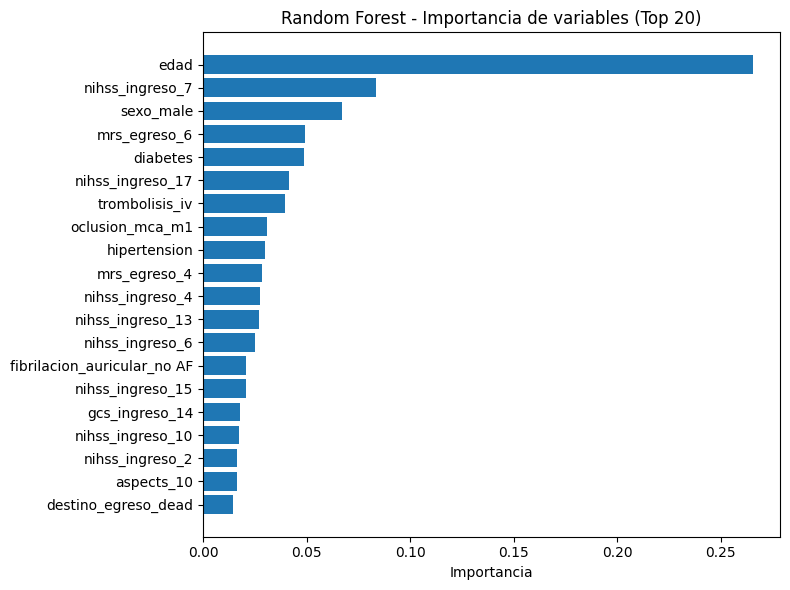

In [134]:
# ============================================================
# Random Forest Regressor: modelo no lineal, robusto a outliers
# ============================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# ---- Preparar X, y (mismo preprocesado que antes) ----
y = df_isquemicos["estancia_dias"].astype(float)

X = df_isquemicos.drop(columns=["id_caso","estancia_dias"], errors="ignore").copy()
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X = X.apply(pd.to_numeric, errors="coerce").astype("float64")

mask_ok = y.notna() & X.notna().all(axis=1)
X, y = X.loc[mask_ok], y.loc[mask_ok]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Entrenar RF ----
rf = RandomForestRegressor(
    n_estimators=600,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ---- Métricas ----
y_pred = rf.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(((y_test - y_pred)**2).mean())
r2   = r2_score(y_test, y_pred)

print("\n=== Random Forest (test) ===")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

# ---- Importancia de variables (Top 20) ----
importances = pd.Series(rf.feature_importances_, index=X.columns)
top = importances.sort_values(ascending=False).head(20).sort_values()

plt.figure(figsize=(8,6))
plt.barh(top.index, top.values)
plt.title("Random Forest - Importancia de variables (Top 20)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()
